In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from itertools import cycle

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA

In [2]:
DIR = Path('Tea Score Images - partition').resolve()
DATA_DIR = DIR / 'Feature data' / 'Color feature data'
CLASS_LABEL = ['Score 1', 'Score 2', 'Score 3', 'Score 4']
COLOR_MODE = ['RGB', 'HSV', 'LAB']

In [3]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

encoder = LabelEncoder()

# RGB Space

In [4]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_RGB'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
rgb_feature = all_data_frames.drop(columns=['class label']).values
rgb_label = all_data_frames['class label'].values
df_rgb = all_data_frames.drop(columns=["class label"])
    
print(rgb_feature.shape)
print(rgb_label.shape)

(160, 12)
(160,)


## Standard Scaler

In [5]:
standard_scaled_rgb = standard_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_rgb)
standard_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 54.02%
explained variance PC2: 33.72%
explained variance PC3: 8.17%
explained variance PC4: 2.48%
explained variance PC5: 1.04%
explained variance PC6: 0.41%
explained variance PC7: 0.10%
explained variance PC8: 0.03%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


In [6]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings RGB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings RGB Standard Scaler.csv", columns=df.columns)

PCA component loadings RGB_Standard scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1  -0.329634  0.191908  0.377582 -0.301647 -0.030122  0.162629 -0.331561   
PC2   0.261831  0.432099  0.103859  0.258829  0.375604 -0.193498  0.245163   
PC3  -0.052216 -0.021731 -0.120801  0.169429  0.562750  0.775195 -0.077069   
PC4  -0.181227 -0.005693 -0.187872 -0.282719  0.588437 -0.520973 -0.243722   
PC5  -0.143775 -0.091601  0.127812  0.829803  0.050531 -0.231226 -0.304839   
PC6   0.112838 -0.252643  0.325280 -0.173516  0.433103 -0.089162  0.301436   
PC7  -0.196184 -0.032434  0.000001 -0.059984  0.060939 -0.012608 -0.573473   
PC8   0.824687 -0.030474 -0.025740 -0.100763 -0.006610  0.028906 -0.497722   
PC9   0.125697 -0.409466  0.035659  0.018963  0.027926 -0.022072  0.041040   
PC10 -0.010943  0.668431 -0.217627 -0.019290 -0.019821  0.008814  0.000794   
PC11 -0.138884 -0.293370 -0.366687  0.014280  0.001216 -0.026514  0.047999   
PC12 -0.002889 -0.035

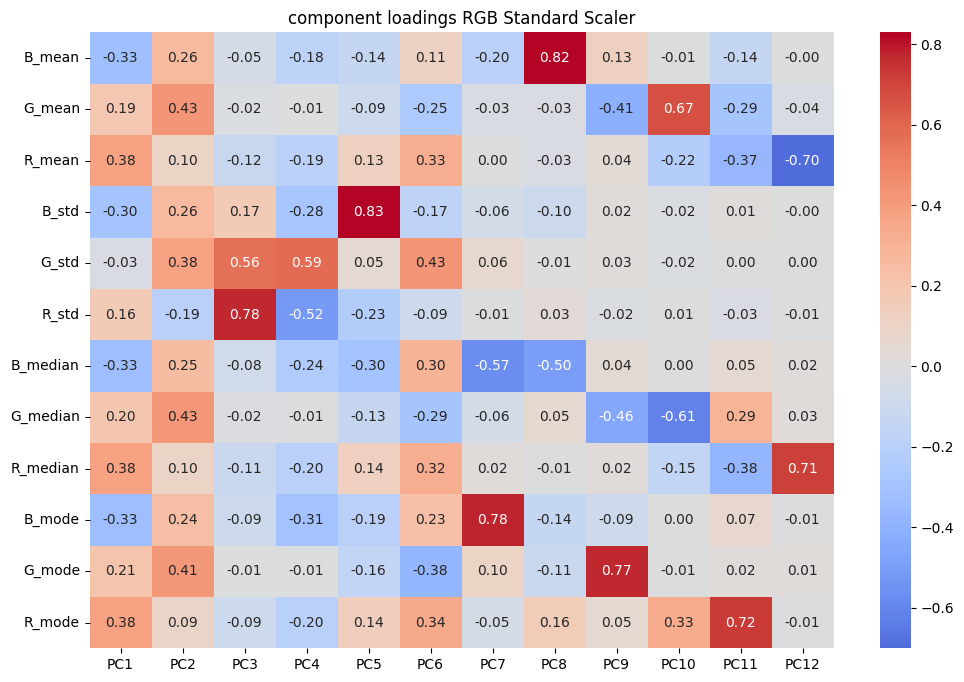

In [7]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings RGB Standard Scaler")
plt.show()

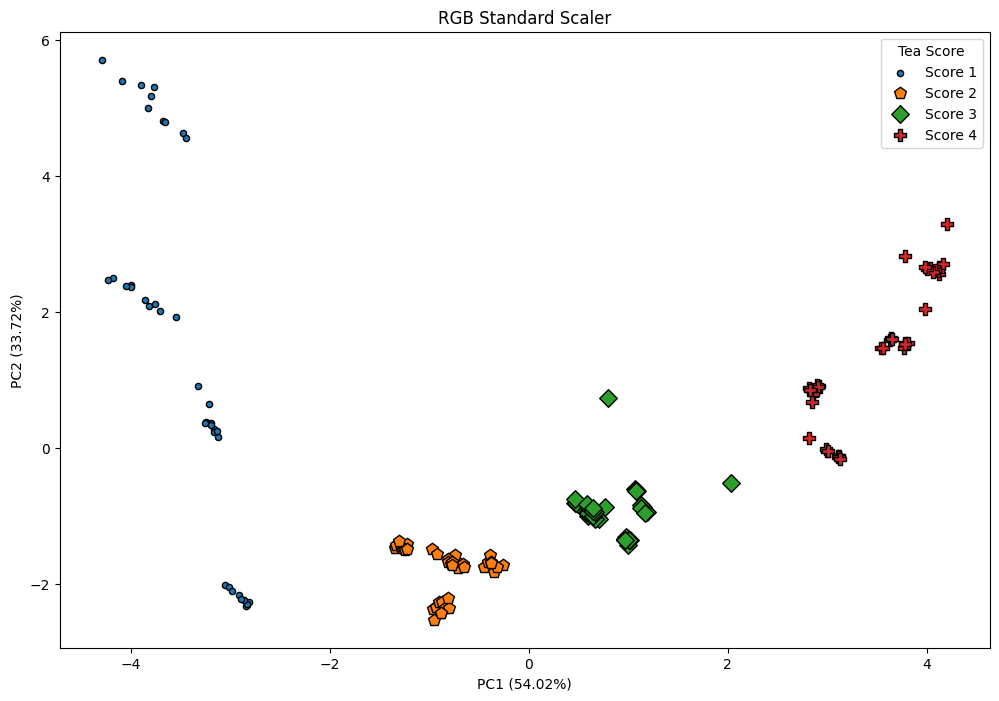

In [8]:
encoded_label_rgb = encoder.fit_transform(rgb_label)

standard_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_rgb_pca_df[standard_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

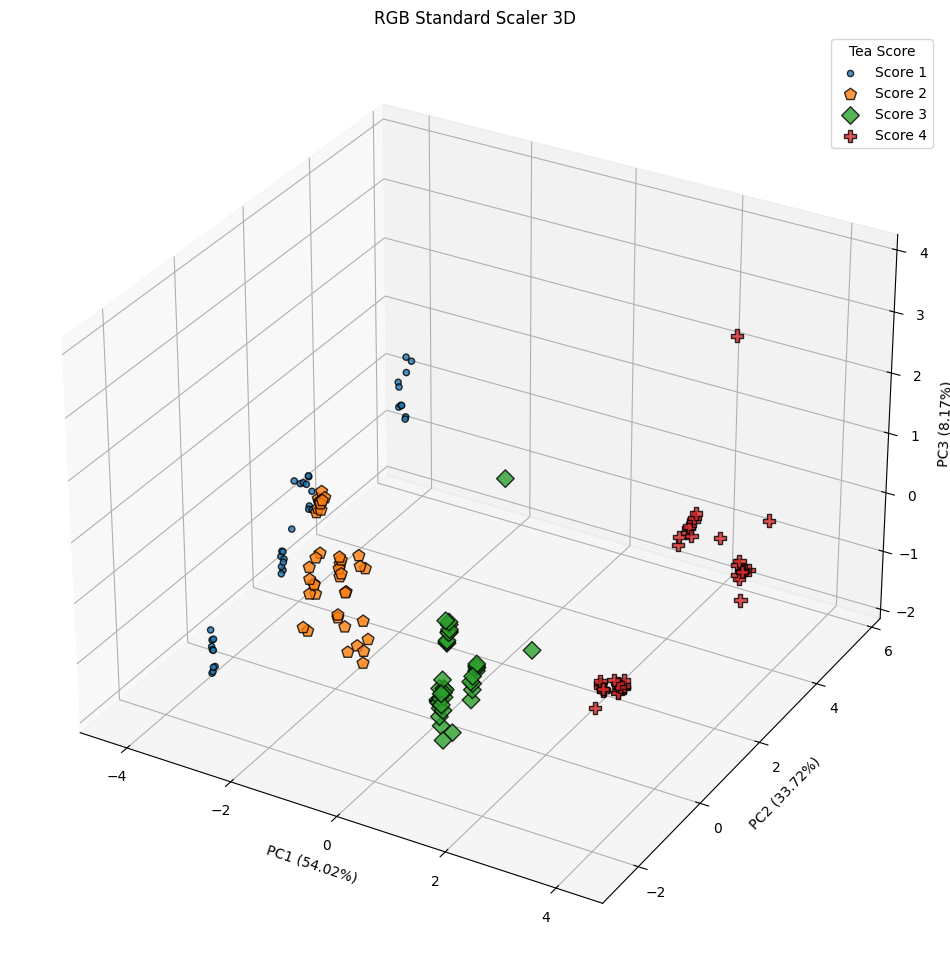

In [23]:
encoded_label_rgb = encoder.fit_transform(rgb_label)

standard_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = standard_rgb_pca_df[standard_rgb_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("RGB Standard Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [34]:
minmaxed_rgb = minmax_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_rgb)
minmax_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 61.76%
explained variance PC2: 29.02%
explained variance PC3: 6.03%
explained variance PC4: 1.87%
explained variance PC5: 0.83%
explained variance PC6: 0.35%
explained variance PC7: 0.08%
explained variance PC8: 0.02%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


In [35]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings RGB_MinMax scaled')
print(component_loadings)

component_loadings.to_csv("component loadings RGB MinMax Scaler.csv", columns=df.columns)

PCA component loadings RGB_MinMax scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1  -0.252539  0.236032  0.441323 -0.211683  0.006118  0.109221 -0.251637   
PC2   0.333149  0.427356  0.033897  0.292838  0.272741 -0.238759  0.313360   
PC3  -0.031927  0.051910 -0.116251  0.191834  0.470196  0.831985 -0.057105   
PC4  -0.223107  0.103558 -0.220159 -0.293914  0.548942 -0.404231 -0.295155   
PC5  -0.120692 -0.110914  0.108668  0.817921  0.174718 -0.251501 -0.287000   
PC6   0.144207 -0.238468  0.228804 -0.244438  0.602766 -0.097048  0.322785   
PC7  -0.174435 -0.035418  0.012753 -0.066072  0.083911 -0.012104 -0.550703   
PC8   0.806700 -0.047426 -0.085210 -0.106713 -0.009062  0.024165 -0.493428   
PC9   0.072416 -0.386440  0.030168  0.029409  0.036442 -0.025282  0.079794   
PC10 -0.130249  0.533772 -0.329463 -0.009094 -0.027132 -0.005358  0.052940   
PC11 -0.188840 -0.489385 -0.267456  0.027930  0.009962 -0.035044  0.072115   
PC12 -0.004013 -0.04264

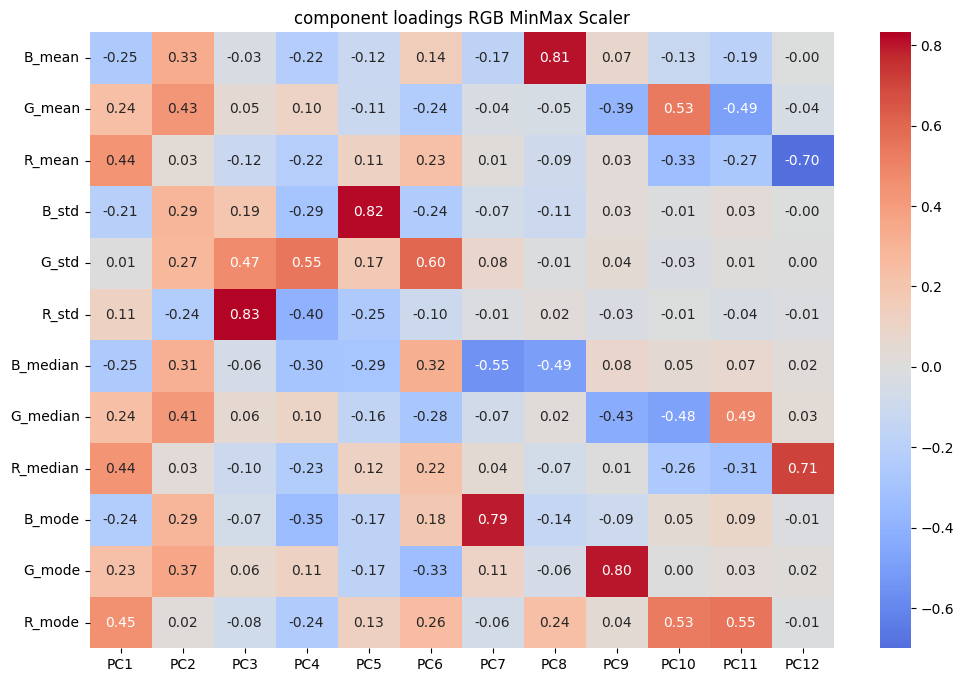

In [36]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings RGB MinMax Scaler")
plt.show()

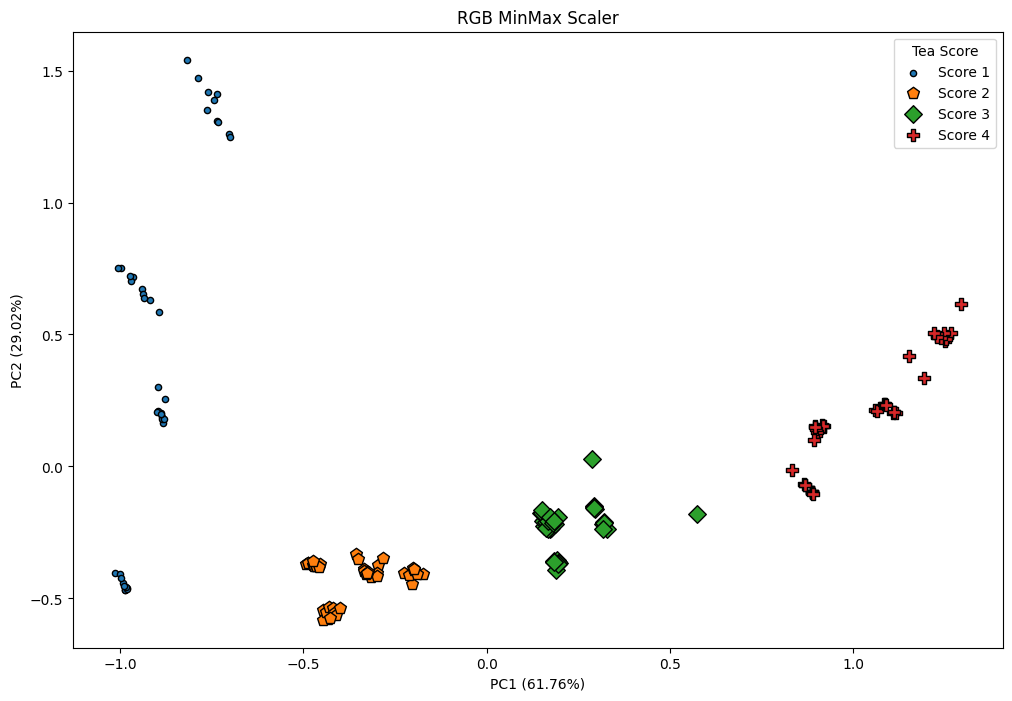

In [37]:
minmax_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_rgb_pca_df[minmax_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

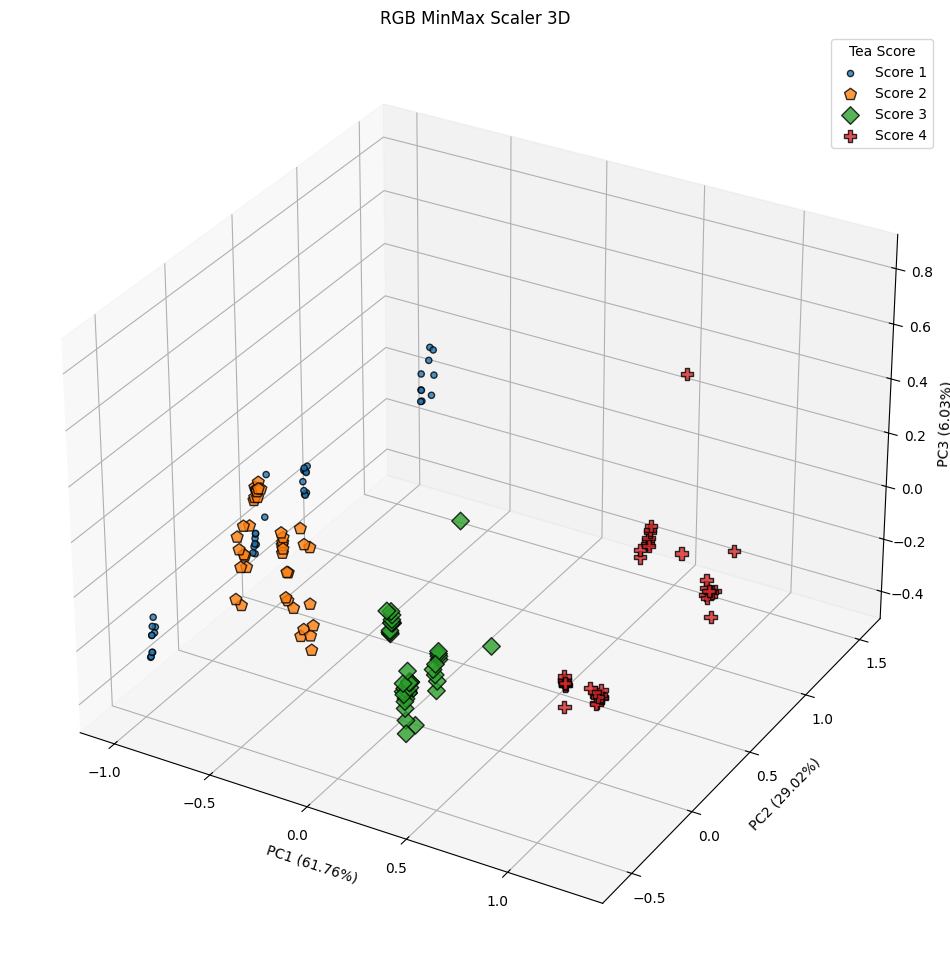

In [38]:
encoded_label_rgb = encoder.fit_transform(rgb_label)

minmax_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = minmax_rgb_pca_df[minmax_rgb_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("RGB MinMax Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [39]:
maxed_rgb = maxabs_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_rgb)
maxabs_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 63.78%
explained variance PC2: 27.35%
explained variance PC3: 5.69%
explained variance PC4: 1.92%
explained variance PC5: 0.76%
explained variance PC6: 0.33%
explained variance PC7: 0.10%
explained variance PC8: 0.03%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


In [40]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings RGB_MaxAbs scaled')
print(component_loadings)

component_loadings.to_csv("component loadings RGB MaxAbs Scaler.csv")

PCA component loadings RGB_MaxAbs scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1  -0.311365  0.166751  0.427357 -0.218847 -0.018617  0.125718 -0.320312   
PC2   0.320295  0.429532  0.134140  0.235036  0.261419 -0.218428  0.310809   
PC3  -0.020957  0.067500 -0.118560  0.195763  0.483806  0.819581 -0.053597   
PC4  -0.196465  0.127874 -0.222100 -0.189999  0.543732 -0.449870 -0.301046   
PC5  -0.073788 -0.108477  0.096415  0.864866  0.097892 -0.216638 -0.277458   
PC6   0.090597 -0.271091  0.219176 -0.218633  0.615797 -0.111507  0.295365   
PC7  -0.171994 -0.026252  0.009401 -0.090686  0.103732 -0.013542 -0.555494   
PC8   0.826536 -0.061173 -0.056057 -0.129409 -0.007492  0.029890 -0.475176   
PC9   0.038128 -0.396374  0.034439  0.030241  0.035462 -0.023985  0.064192   
PC10 -0.142494  0.369508 -0.397738 -0.001961 -0.022666 -0.016503  0.051870   
PC11  0.115139  0.617223  0.161910 -0.027025 -0.014462  0.030354 -0.039662   
PC12 -0.003653 -0.04986

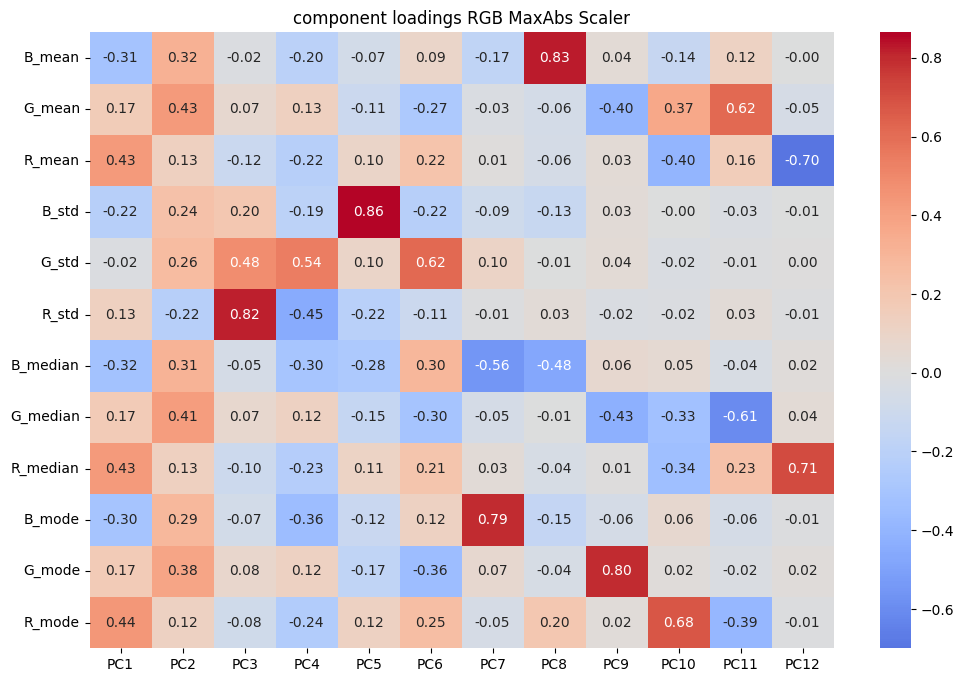

In [41]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings RGB MaxAbs Scaler")
plt.show()

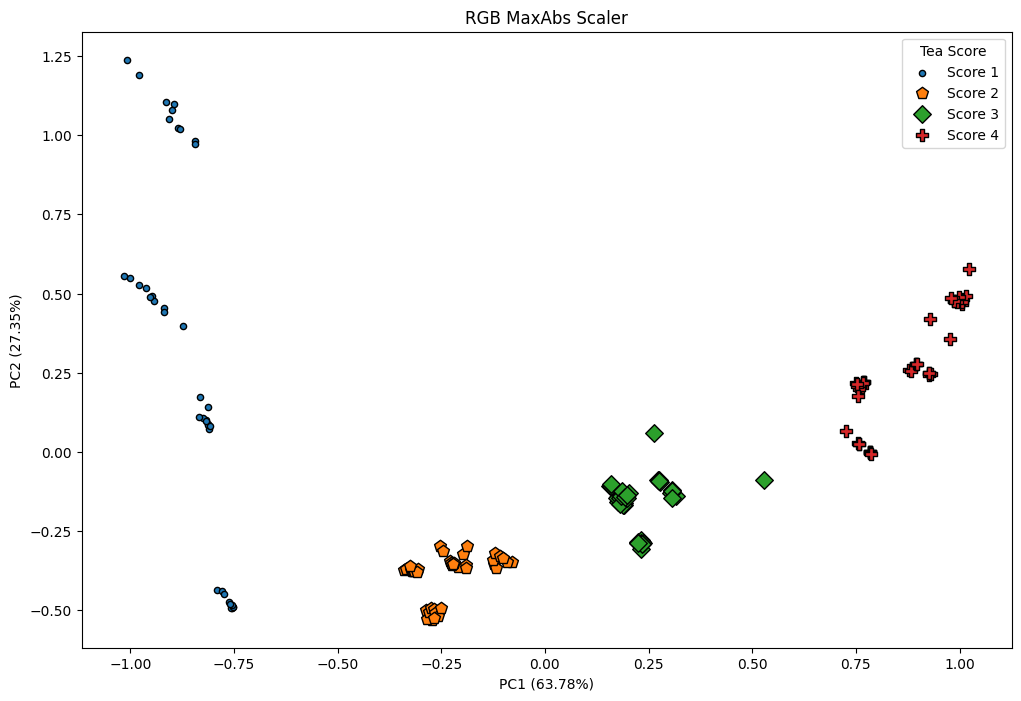

In [42]:
maxabs_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_rgb_pca_df[maxabs_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

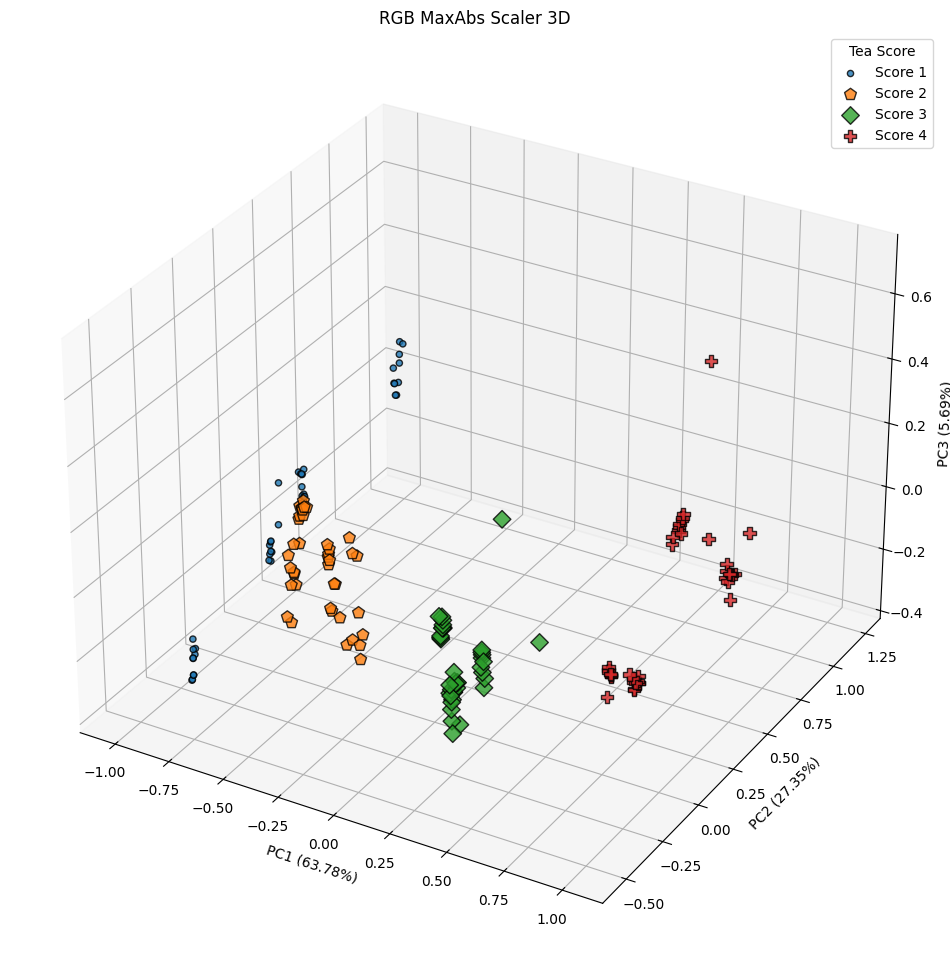

In [43]:
encoded_label_rgb = encoder.fit_transform(rgb_label)

maxabs_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = maxabs_rgb_pca_df[maxabs_rgb_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("RGB MaxAbs Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [44]:
robust_scaled_rgb = robust_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_rgb)
robust_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 77.02%
explained variance PC2: 15.72%
explained variance PC3: 4.08%
explained variance PC4: 1.45%
explained variance PC5: 1.24%
explained variance PC6: 0.22%
explained variance PC7: 0.20%
explained variance PC8: 0.06%
explained variance PC9: 0.01%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [45]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings RGB_Robust scaled')
print(component_loadings)

component_loadings.to_csv("component loadings RGB Robust Scaler.csv", columns=df.columns)

PCA component loadings RGB_Robust scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1   0.540102 -0.003091 -0.140682  0.379300  0.087465 -0.107165  0.505019   
PC2   0.074218  0.448115  0.274303  0.091355  0.327568 -0.051877  0.032905   
PC3  -0.086688 -0.052679 -0.136240  0.474395  0.551713  0.583808 -0.178286   
PC4  -0.104264 -0.023636  0.213413  0.695052 -0.564994  0.058200 -0.169922   
PC5   0.042521 -0.003653  0.126893 -0.341010 -0.245921  0.780581  0.289214   
PC6  -0.139125  0.041275 -0.095298 -0.082906  0.051927  0.000501 -0.593378   
PC7  -0.184643 -0.241568  0.334937 -0.021808  0.443489 -0.160883  0.131513   
PC8   0.791822 -0.099714  0.115832 -0.125261  0.020610  0.069578 -0.478646   
PC9   0.020870 -0.425627  0.040901  0.013481  0.029054 -0.026972  0.029334   
PC10 -0.001333  0.684117 -0.203215 -0.009920 -0.017763  0.010470 -0.000982   
PC11 -0.041444 -0.274806 -0.377759  0.005320  0.000304 -0.025429  0.013257   
PC12  0.001065  0.03378

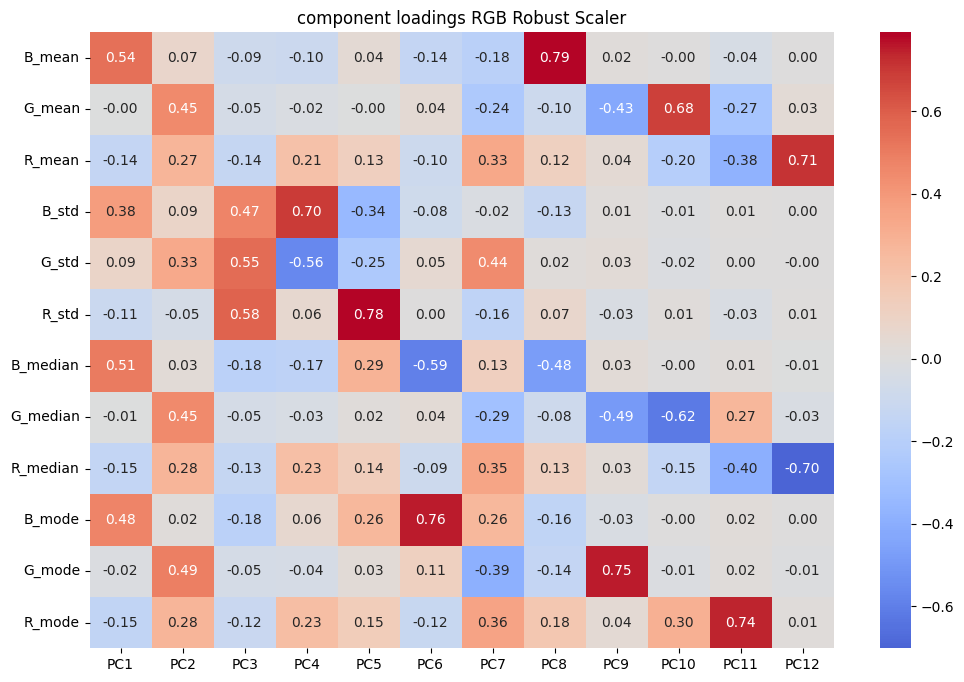

In [46]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings RGB Robust Scaler")
plt.show()

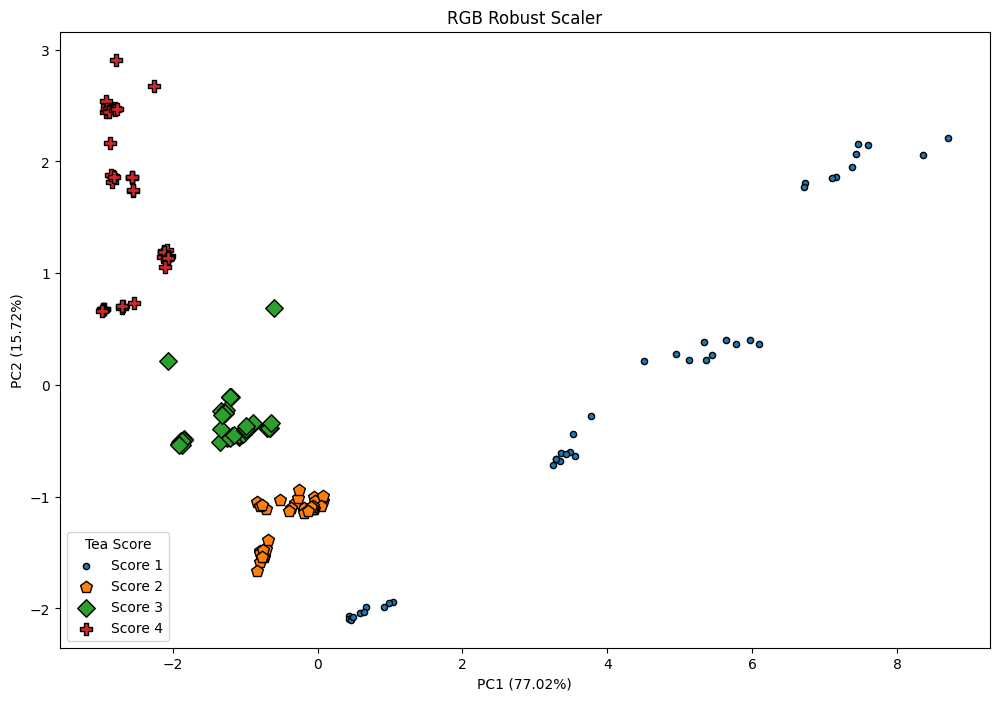

In [47]:
robust_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_rgb_pca_df[robust_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

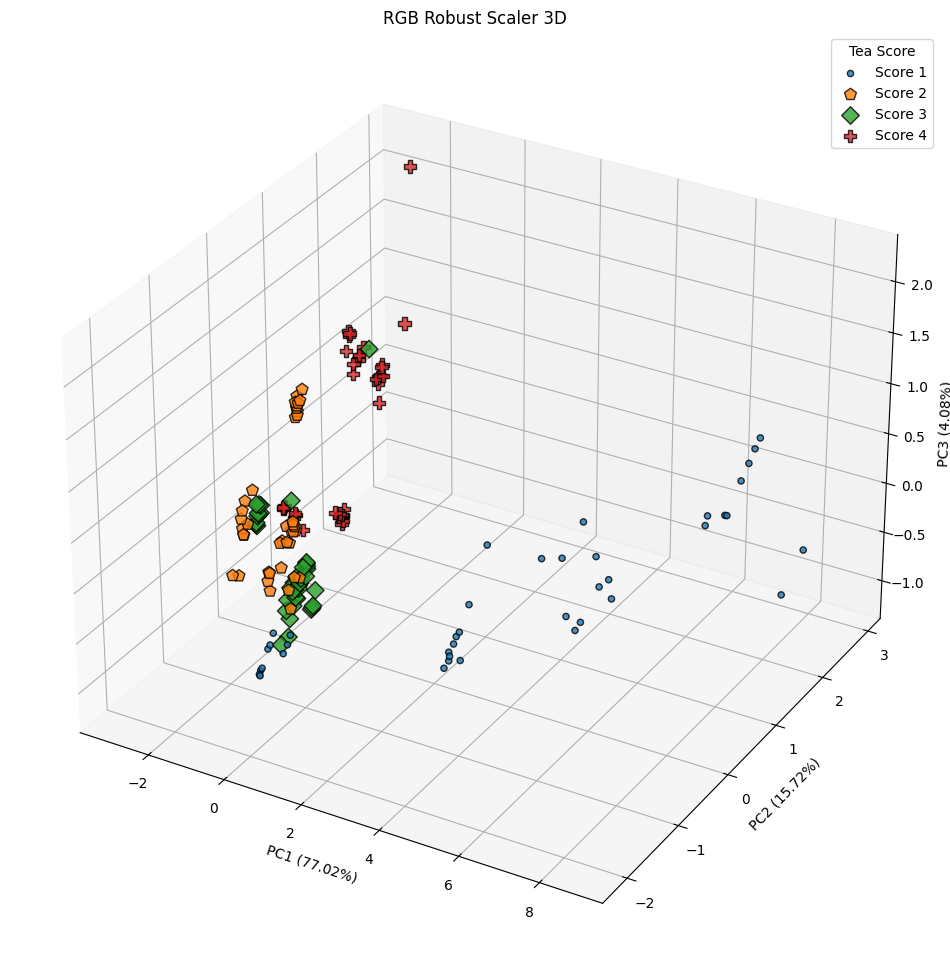

In [48]:
encoded_label_rgb = encoder.fit_transform(rgb_label)

robust_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = robust_rgb_pca_df[robust_rgb_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("RGB Robust Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

# HSV Space

In [58]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_HSV'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
hsv_feature = all_data_frames.drop(columns=['class label']).values
hsv_label = all_data_frames['class label'].values
df_hsv = all_data_frames.drop(columns=["class label"])

print(hsv_feature.shape)
print(hsv_label.shape)

(160, 12)
(160,)


## Standard Scaler

In [59]:
standard_scaled_hsv = standard_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_hsv)
standard_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.77%
explained variance PC2: 13.90%
explained variance PC3: 6.20%
explained variance PC4: 2.47%
explained variance PC5: 0.94%
explained variance PC6: 0.56%
explained variance PC7: 0.08%
explained variance PC8: 0.05%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [60]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings HSV_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings HSV Standard Scaler.csv", columns=df.columns)

PCA component loadings HSV_Standard scaled
        H_mean    S_mean    V_mean     H_std     S_std     V_std  H_median  \
PC1  -0.275827  0.325720  0.278548 -0.265070 -0.317684  0.184633 -0.285134   
PC2   0.389915 -0.070177  0.408008 -0.238189 -0.062688 -0.309951  0.326899   
PC3   0.252842  0.091622 -0.037193 -0.184040  0.156264  0.824692  0.312139   
PC4  -0.014501  0.060480  0.190750  0.900390 -0.005353  0.126288  0.021933   
PC5   0.064918  0.393060 -0.173972 -0.034548  0.166638 -0.415225  0.251245   
PC6  -0.159528 -0.136117  0.146851 -0.079830  0.896227 -0.021079 -0.147593   
PC7  -0.664172 -0.074464 -0.016115 -0.133015 -0.037700  0.018197 -0.074028   
PC8   0.185421 -0.350199 -0.101591 -0.045902 -0.150502 -0.000595 -0.144921   
PC9  -0.434465 -0.194068 -0.064391  0.025548 -0.078076 -0.007358  0.764147   
PC10  0.116958 -0.178675 -0.403755  0.000523 -0.013085 -0.019411 -0.125675   
PC11 -0.001657  0.707067 -0.068646  0.018653  0.096777 -0.011442  0.052597   
PC12  0.011644  0.078

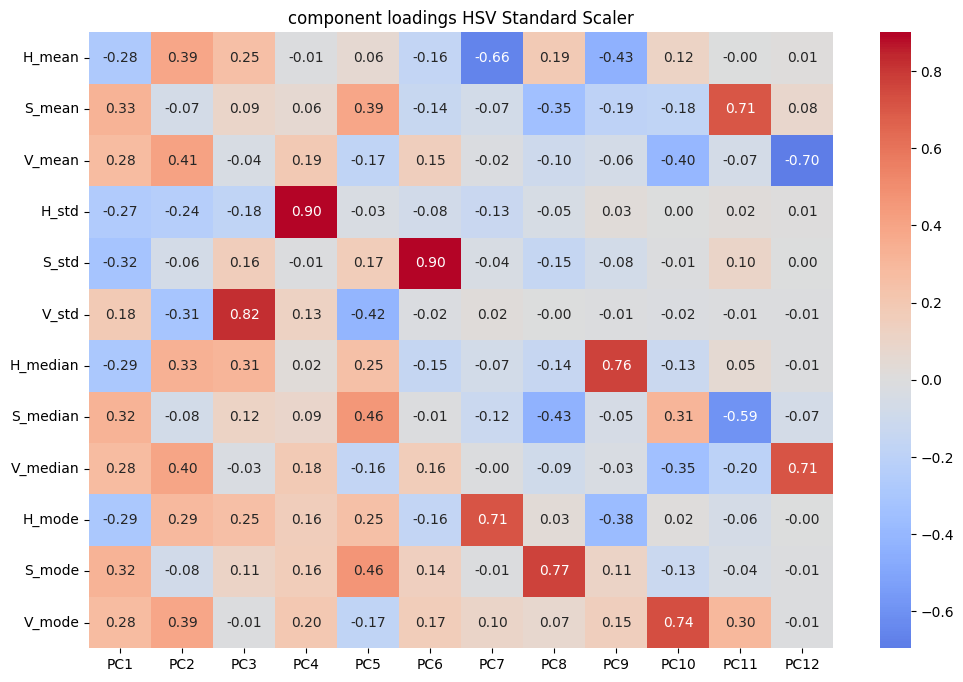

In [61]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings HSV Standard Scaler")
plt.show()

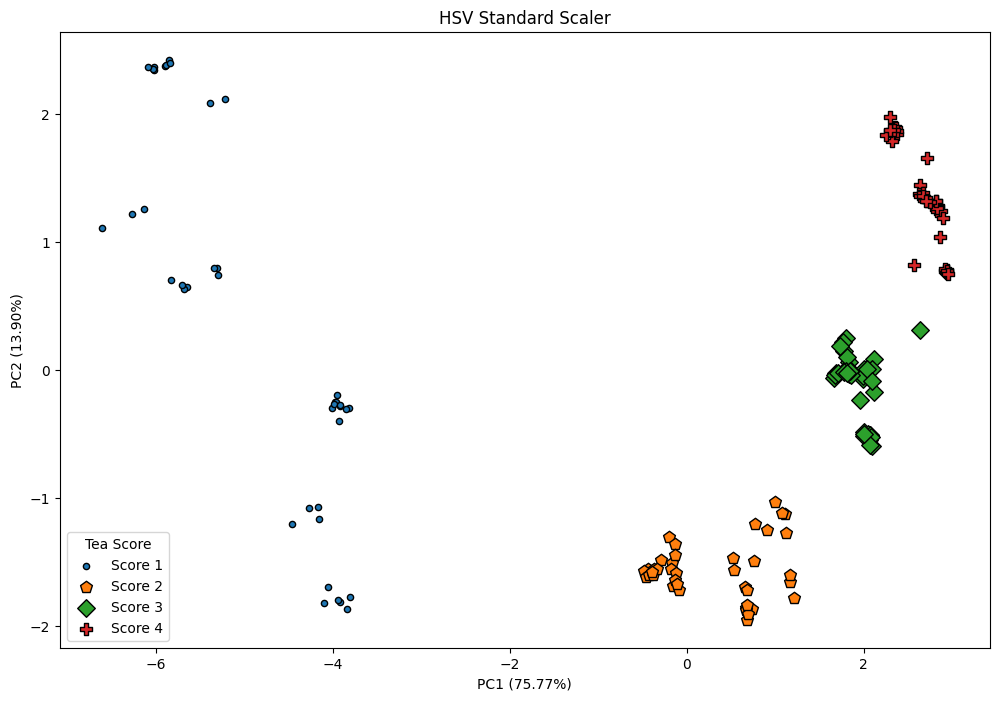

In [62]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

standard_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_hsv_pca_df[standard_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

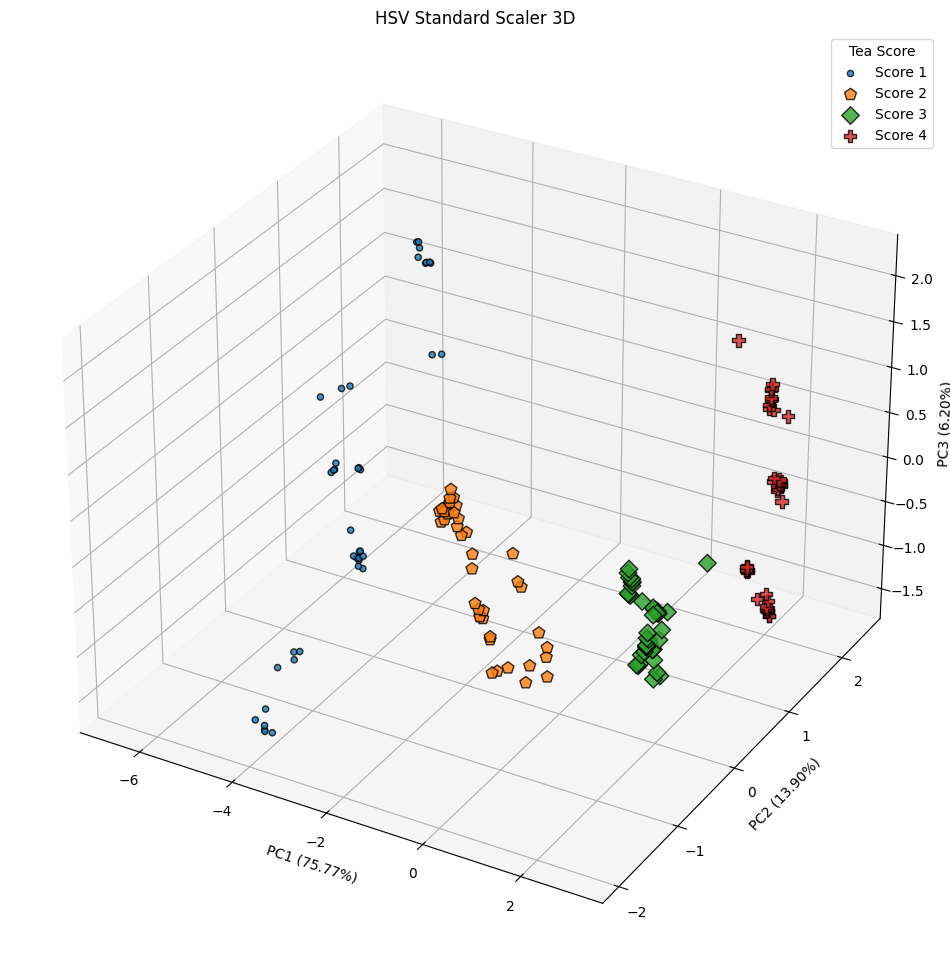

In [63]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

standard_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = standard_hsv_pca_df[standard_hsv_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("HSV Standard Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [64]:
minmaxed_hsv = minmax_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_hsv)
minmax_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 78.35%
explained variance PC2: 13.81%
explained variance PC3: 4.60%
explained variance PC4: 1.64%
explained variance PC5: 0.95%
explained variance PC6: 0.49%
explained variance PC7: 0.07%
explained variance PC8: 0.07%
explained variance PC9: 0.01%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [65]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings HSV_MinMax scaled')
print(component_loadings)

component_loadings.to_csv("component loadings HSV MinMax Scaler.csv", columns=df.columns)

PCA component loadings HSV_MinMax scaled
        H_mean    S_mean    V_mean     H_std     S_std     V_std  H_median  \
PC1  -0.235034  0.341910  0.310389 -0.202088 -0.285327  0.144451 -0.251281   
PC2   0.376113 -0.118083  0.420416 -0.144818 -0.022977 -0.263388  0.329781   
PC3   0.260276  0.129094 -0.054368 -0.139634  0.172399  0.780577  0.338943   
PC4  -0.049820  0.035924  0.123931  0.928924  0.072590  0.052692  0.005481   
PC5  -0.113421 -0.335487  0.163905  0.092974 -0.128740  0.543181 -0.258895   
PC6  -0.152342 -0.165525  0.106802 -0.124918  0.897099 -0.035283 -0.142374   
PC7  -0.468101 -0.250428 -0.081035 -0.169737 -0.140129  0.016148 -0.124468   
PC8   0.504219 -0.285454 -0.065962  0.030538 -0.151026 -0.008155 -0.030035   
PC9  -0.439652 -0.191135 -0.102448  0.031459 -0.078971 -0.011191  0.753479   
PC10  0.173278 -0.121412 -0.405096  0.001204 -0.003272 -0.026502 -0.190567   
PC11 -0.010880  0.713566 -0.045818  0.026092  0.114071 -0.013791  0.073324   
PC12  0.014401  0.08123

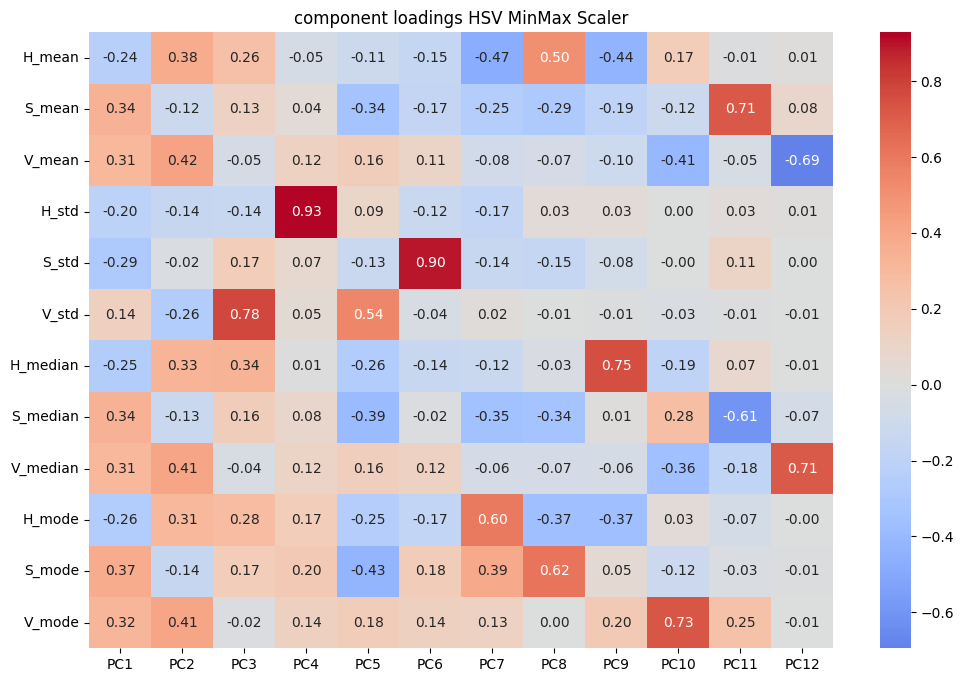

In [66]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings HSV MinMax Scaler")
plt.show()

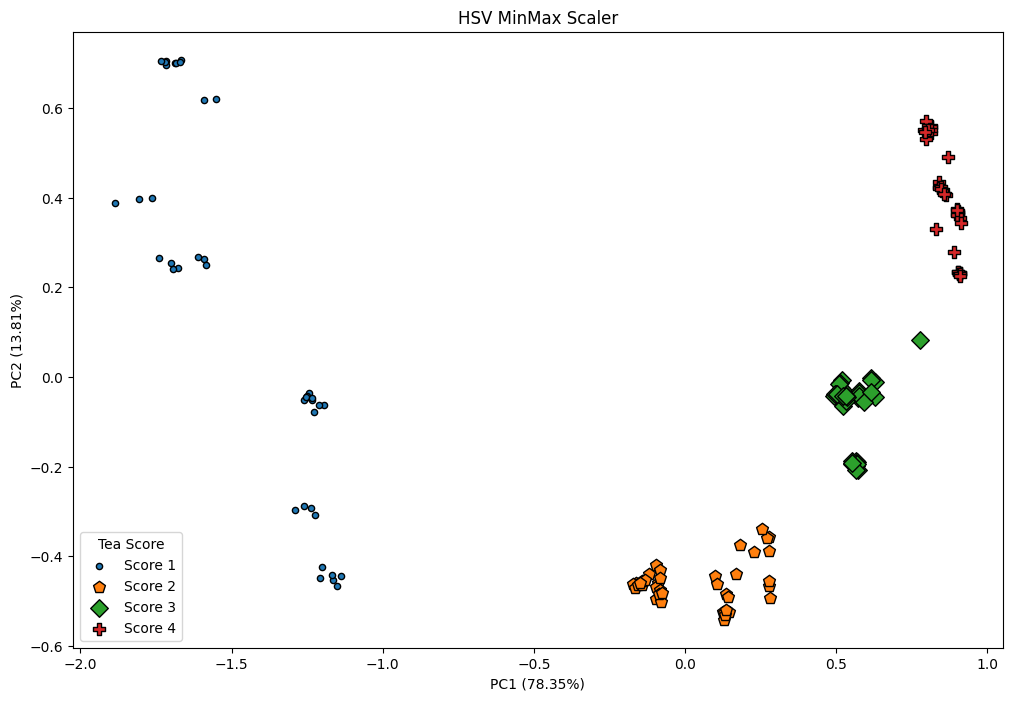

In [67]:
minmax_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_hsv_pca_df[minmax_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

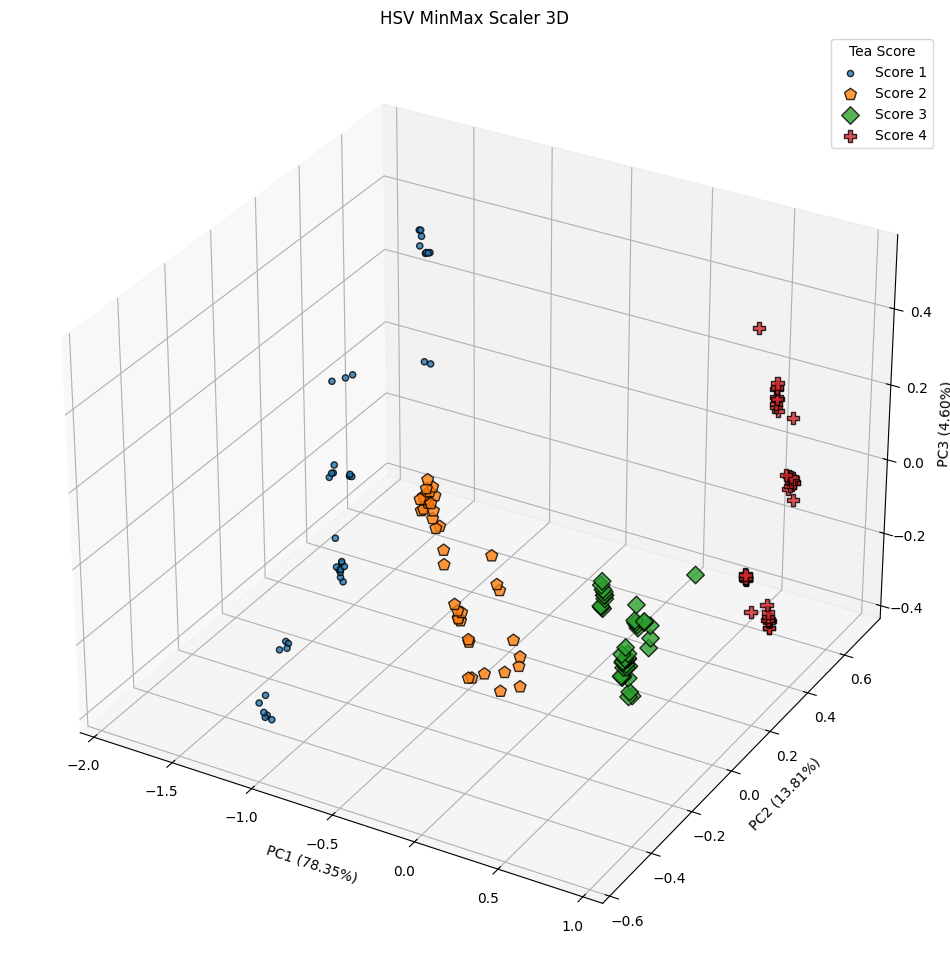

In [68]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

minmax_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = minmax_hsv_pca_df[minmax_hsv_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("HSV MinMax Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [69]:
maxed_hsv = maxabs_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_hsv)
maxabs_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.77%
explained variance PC2: 14.59%
explained variance PC3: 5.81%
explained variance PC4: 2.79%
explained variance PC5: 0.80%
explained variance PC6: 0.16%
explained variance PC7: 0.05%
explained variance PC8: 0.01%
explained variance PC9: 0.01%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [70]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings HSV_MaxAbs scaled')
print(component_loadings)

component_loadings.to_csv("component loadings HSV MaxAbs Scaler.csv")

PCA component loadings HSV_MaxAbs scaled
        H_mean    S_mean    V_mean     H_std     S_std     V_std  H_median  \
PC1  -0.192064  0.097945  0.437778 -0.292388 -0.396411  0.141195 -0.201343   
PC2   0.449282 -0.084238  0.305087 -0.029127  0.173668 -0.431783  0.393163   
PC3   0.246589  0.024830  0.003328 -0.260617  0.198304  0.835398  0.280271   
PC4  -0.057722  0.012953  0.165831  0.908915  0.019360  0.267919 -0.027712   
PC5  -0.243622 -0.018478  0.120729 -0.089330  0.875880 -0.037663 -0.224478   
PC6  -0.292530  0.465887 -0.073241 -0.020800  0.045662 -0.143179  0.216958   
PC7  -0.571201 -0.235588 -0.048240 -0.100758 -0.026814  0.030473 -0.140715   
PC8   0.179615 -0.107748 -0.415813 -0.000330 -0.019873 -0.030448 -0.096002   
PC9  -0.426462 -0.073188 -0.081546  0.029770 -0.022030 -0.008051  0.755290   
PC10 -0.105694 -0.390530  0.069560 -0.008092 -0.038104  0.008594  0.165312   
PC11  0.024840 -0.136021 -0.676670  0.006860 -0.013371 -0.005611 -0.031041   
PC12 -0.001741  0.72225

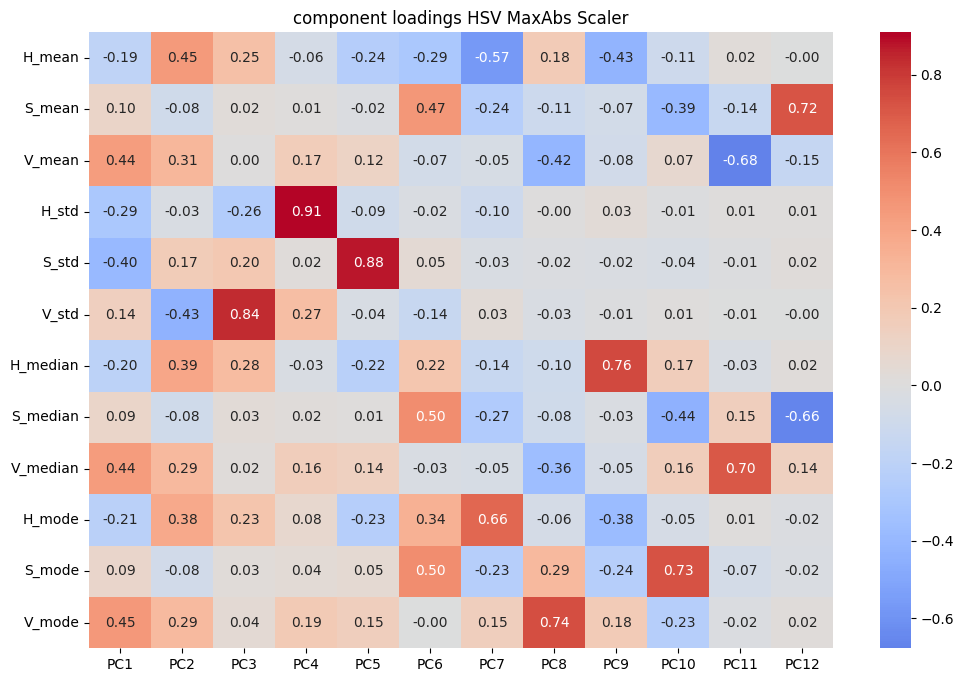

In [71]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings HSV MaxAbs Scaler")
plt.show()

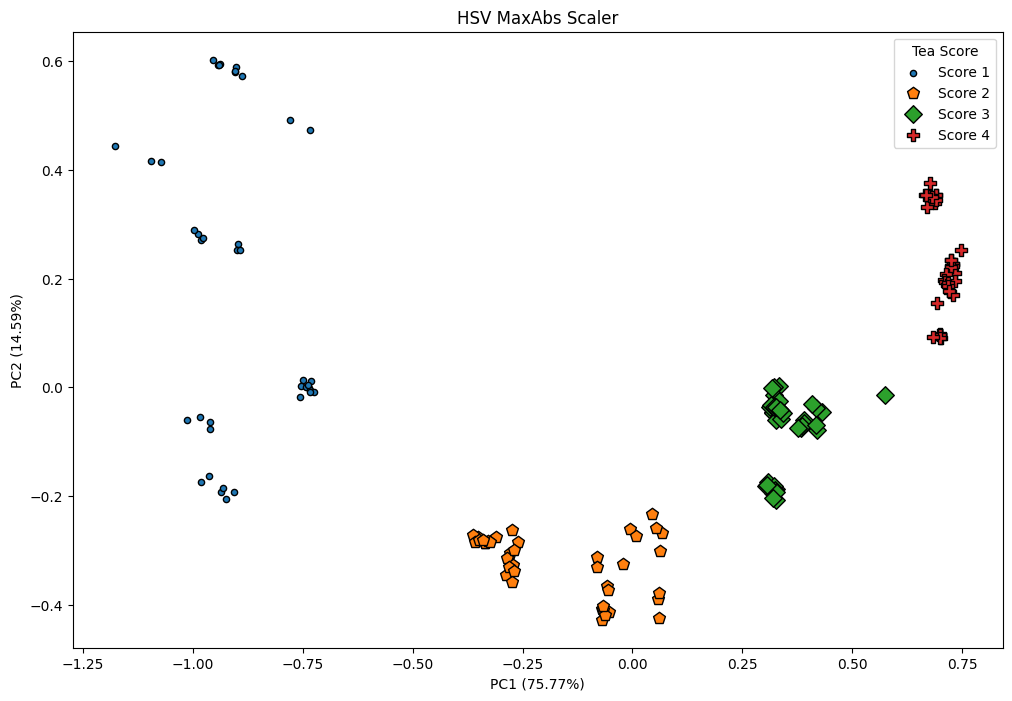

In [72]:
maxabs_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_hsv_pca_df[maxabs_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

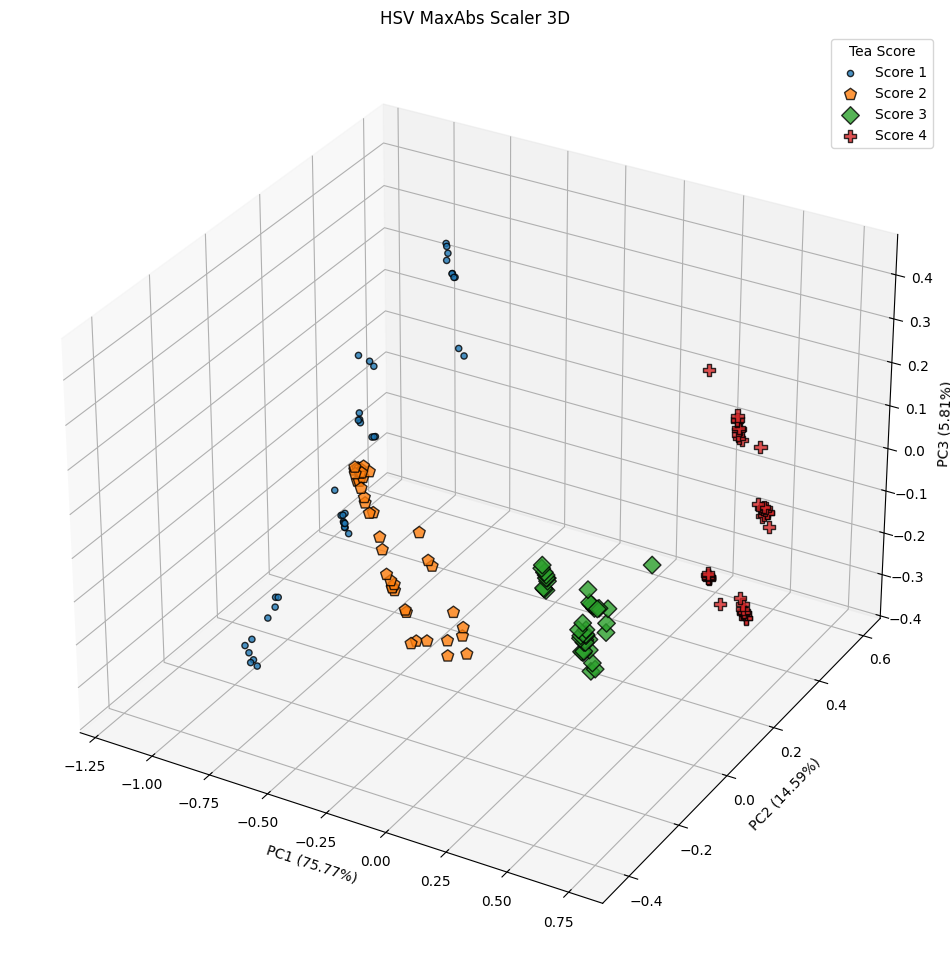

In [73]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

maxabs_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = maxabs_hsv_pca_df[maxabs_hsv_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("HSV MaxAbs Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [74]:
robust_scaled_hsv = robust_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_hsv)
robust_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 83.78%
explained variance PC2: 9.97%
explained variance PC3: 3.33%
explained variance PC4: 1.78%
explained variance PC5: 0.68%
explained variance PC6: 0.24%
explained variance PC7: 0.11%
explained variance PC8: 0.08%
explained variance PC9: 0.03%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [75]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings HSV_Robust scaled')
print(component_loadings)

component_loadings.to_csv("component loadings HSV Robust Scaler.csv")

PCA component loadings HSV_Robust scaled
        H_mean    S_mean    V_mean     H_std     S_std     V_std  H_median  \
PC1  -0.360617  0.357185  0.131163 -0.191545 -0.169490  0.109592 -0.409425   
PC2   0.435311  0.162420  0.313862 -0.387674 -0.104717  0.008286  0.424938   
PC3   0.046616  0.179535 -0.252758  0.181928  0.184902  0.672493  0.270090   
PC4  -0.007028  0.079298  0.192420  0.840150 -0.052914 -0.243790  0.020801   
PC5   0.034828 -0.204940  0.276814  0.163998 -0.127510  0.687689 -0.187982   
PC6  -0.081162 -0.319488  0.121268 -0.096757  0.817086 -0.027617 -0.061855   
PC7  -0.661491 -0.025213  0.043340 -0.173028 -0.055915  0.042132 -0.011711   
PC8   0.166501 -0.235746 -0.120332 -0.074845 -0.400838  0.011123 -0.170322   
PC9  -0.449981 -0.167989  0.010172  0.039816 -0.181358 -0.007512  0.710811   
PC10 -0.036229  0.745906  0.115566  0.024174  0.201547 -0.005003  0.067501   
PC11  0.036310  0.146169 -0.402063  0.008579  0.046048 -0.023586 -0.016958   
PC12 -0.005546 -0.03566

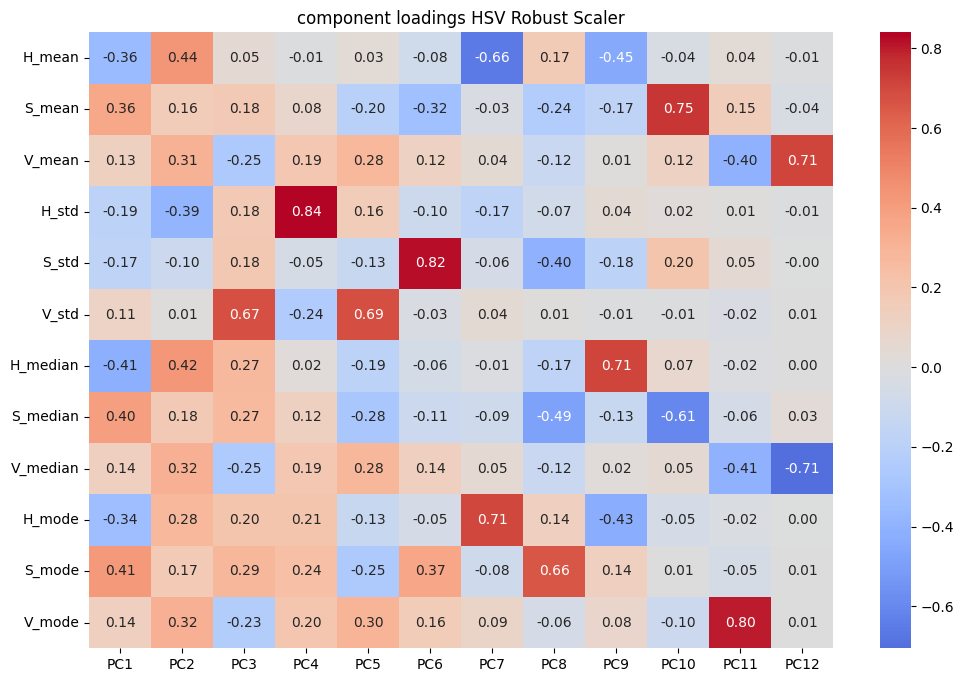

In [76]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings HSV Robust Scaler")
plt.show()

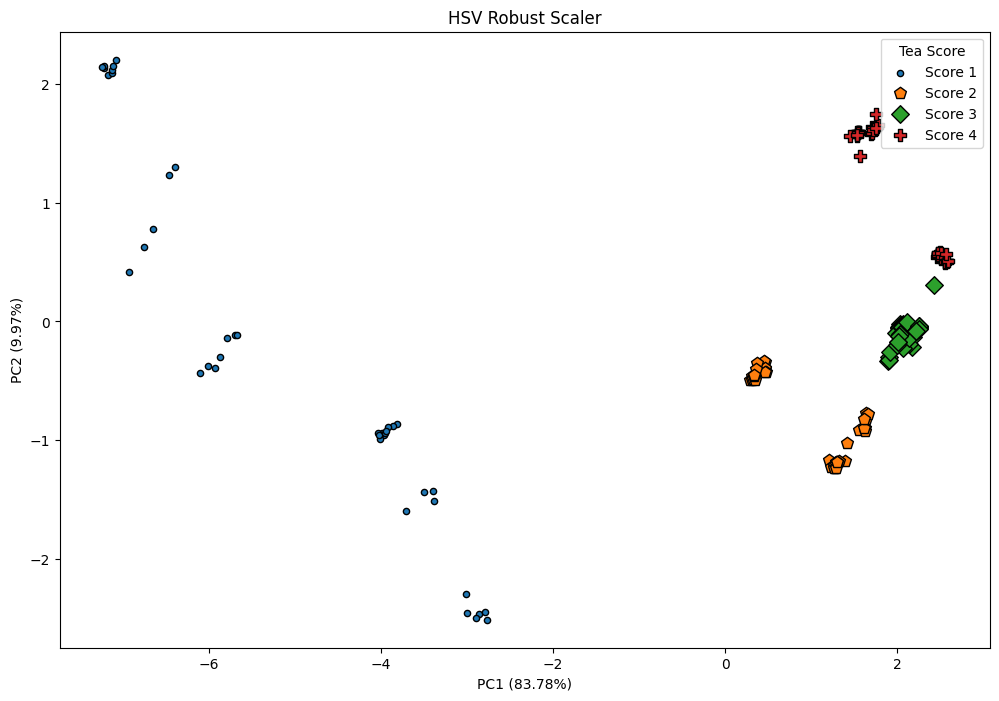

In [77]:
robust_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_hsv_pca_df[robust_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

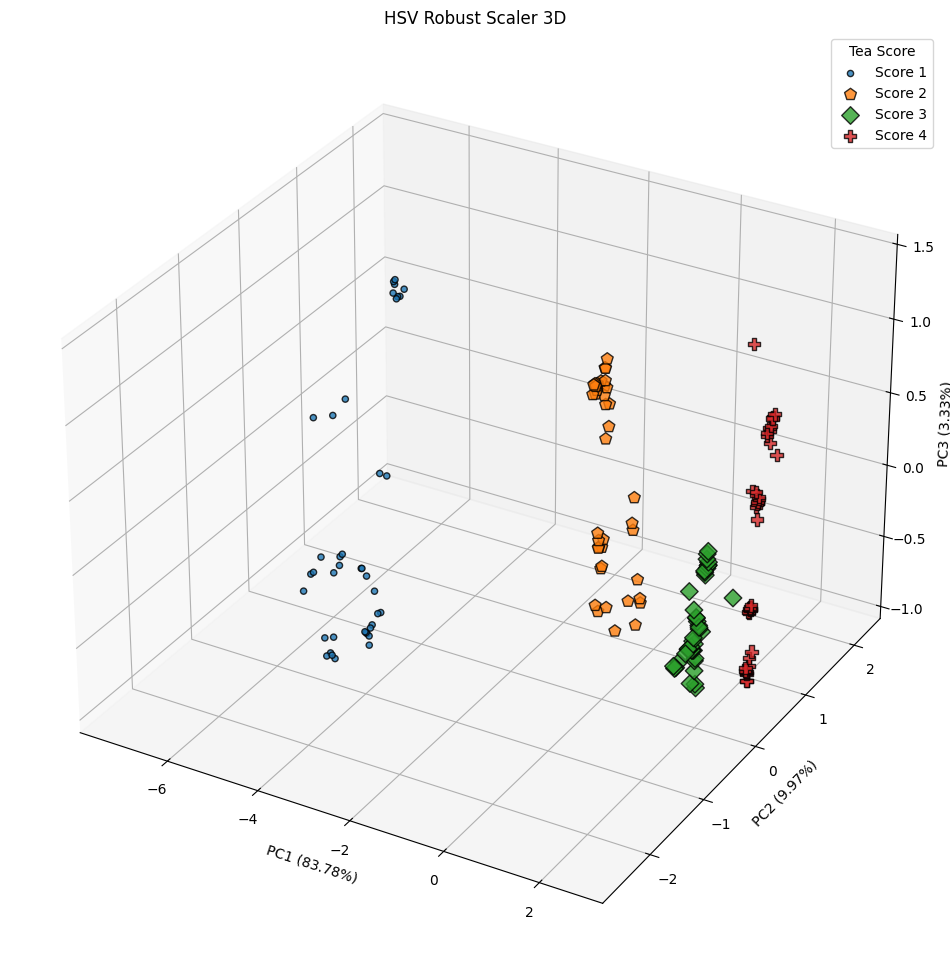

In [78]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

robust_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = robust_hsv_pca_df[robust_hsv_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("HSV Robust Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

# LAB Space

In [79]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_LAB'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
lab_feature = all_data_frames.drop(columns=['class label']).values
lab_label = all_data_frames['class label'].values
df_lab = all_data_frames.drop(columns=["class label"]) 

print(lab_feature.shape)
print(lab_label.shape)

(160, 12)
(160,)


## Standard Scaler

In [80]:
standard_scaled_lab = standard_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_lab)
standard_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.27%
explained variance PC2: 23.90%
explained variance PC3: 0.42%
explained variance PC4: 0.27%
explained variance PC5: 0.08%
explained variance PC6: 0.03%
explained variance PC7: 0.02%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [81]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings LAB Standard Scaler.csv")

PCA component loadings LAB_Standard scaled
        L_mean    A_mean    B_mean     L_std     A_std     B_std  L_median  \
PC1   0.331268  0.330773  0.332621  0.053081 -0.086170 -0.035563  0.331723   
PC2  -0.032725  0.043722 -0.001783  0.576601  0.563813  0.582401 -0.021816   
PC3   0.277566 -0.327940 -0.007951  0.570459 -0.136845 -0.312852  0.243906   
PC4   0.119382 -0.011399 -0.052382 -0.263010  0.789919 -0.487193  0.115668   
PC5   0.276709 -0.220921 -0.032957 -0.506171  0.030231  0.567026  0.279716   
PC6  -0.369846 -0.232655  0.125904 -0.100051  0.119984 -0.028774 -0.302365   
PC7  -0.142256 -0.082282 -0.436154  0.051185 -0.126112  0.028333 -0.030965   
PC8  -0.223432  0.299015  0.131967  0.029213 -0.026743 -0.008744 -0.388833   
PC9  -0.224144 -0.469552 -0.007113  0.002811 -0.000767 -0.008746  0.013323   
PC10  0.164314  0.075228  0.619040 -0.018046  0.007466  0.030603 -0.300942   
PC11 -0.016874  0.579466 -0.443337  0.005649 -0.000757 -0.006975  0.029105   
PC12  0.660953 -0.141

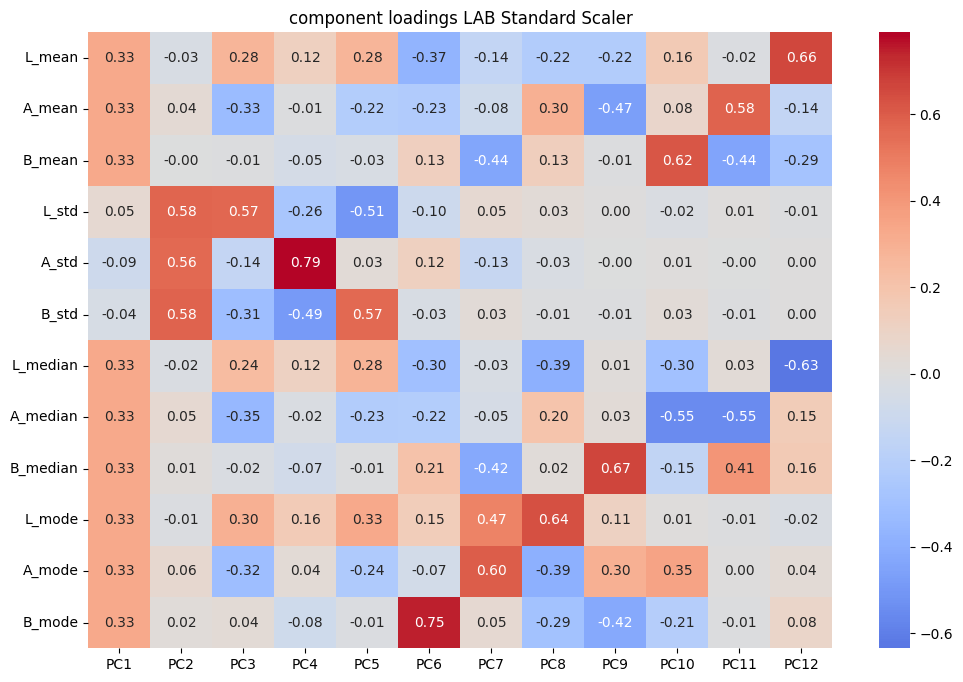

In [82]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings LAB Standard Scaler")
plt.show()

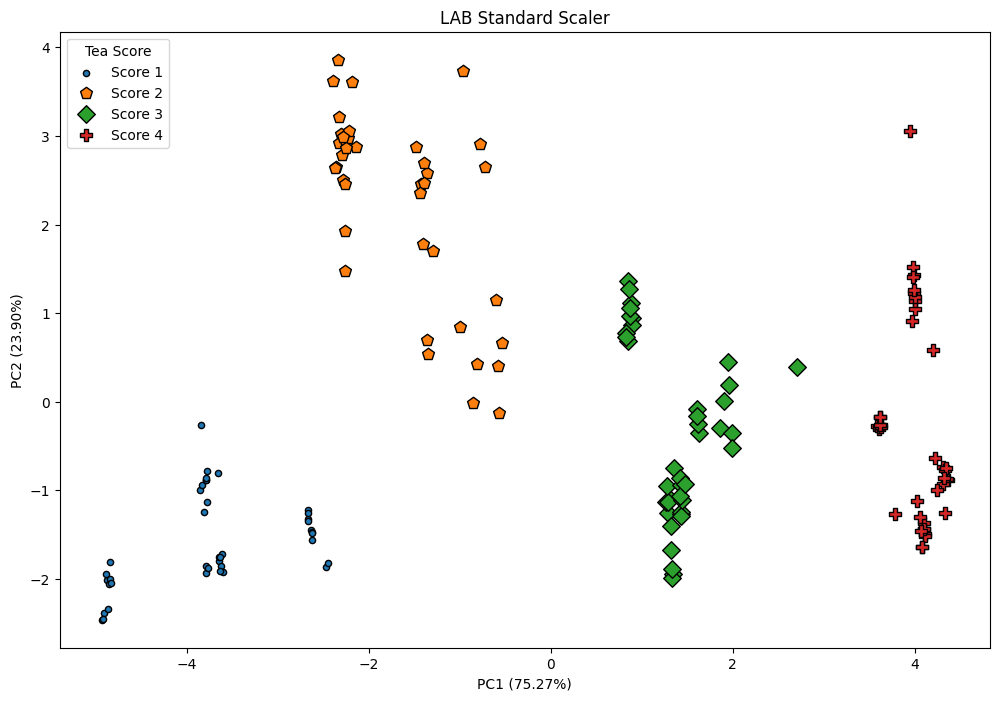

In [83]:
encoded_label_lab = encoder.fit_transform(lab_label)

standard_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_lab_pca_df[standard_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

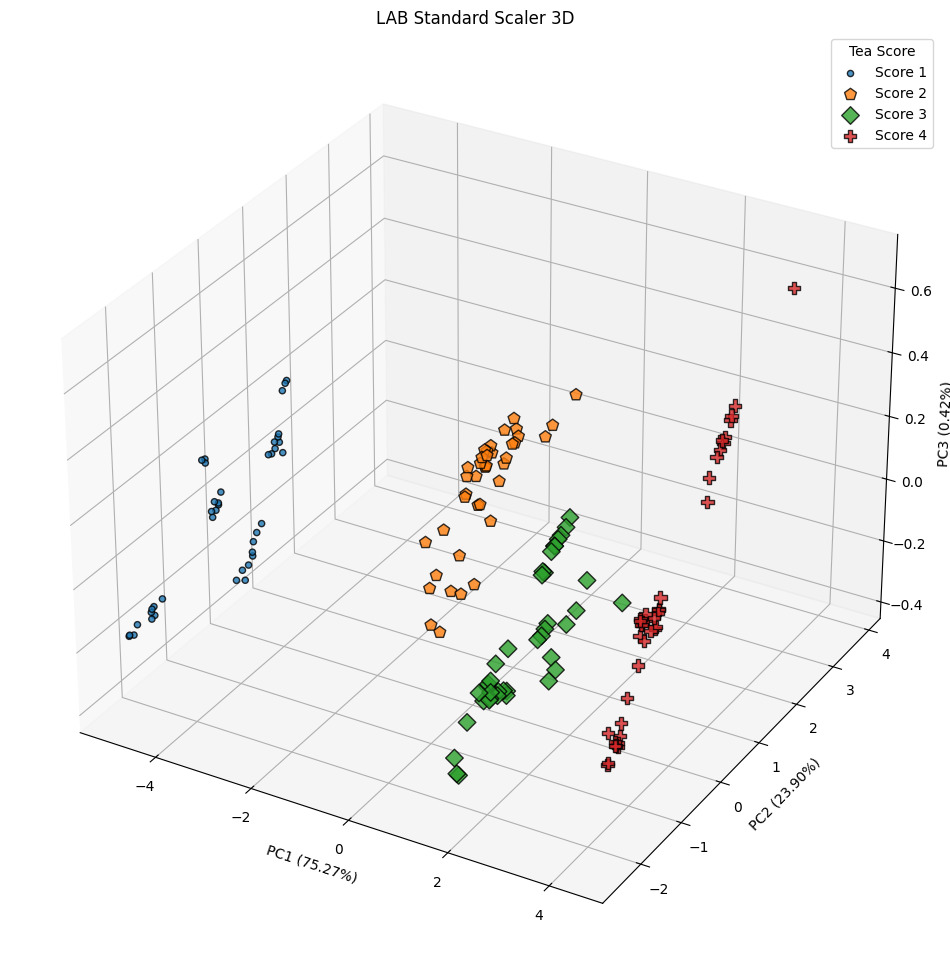

In [84]:
encoded_label_lab = encoder.fit_transform(lab_label)

standard_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = standard_lab_pca_df[standard_lab_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("LAB Standard Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [85]:
minmaxed_lab = minmax_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_lab)
minmax_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 82.79%
explained variance PC2: 16.50%
explained variance PC3: 0.38%
explained variance PC4: 0.19%
explained variance PC5: 0.07%
explained variance PC6: 0.03%
explained variance PC7: 0.02%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [86]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings LAB_MinMax scaled')
print(component_loadings)

component_loadings.to_csv("component loadings LAB MinMax Scaler.csv")

PCA component loadings LAB_MinMax scaled
        L_mean    A_mean    B_mean     L_std     A_std     B_std  L_median  \
PC1   0.326127  0.332659  0.335367  0.041854 -0.064544 -0.027170  0.325066   
PC2  -0.048512  0.048835 -0.009615  0.540995  0.555028  0.619417 -0.034708   
PC3   0.330776 -0.355075 -0.003885  0.465122 -0.002239 -0.243904  0.294627   
PC4   0.083884  0.040123 -0.081148 -0.298368  0.793638 -0.449351  0.084815   
PC5  -0.233796  0.152913  0.046874  0.606844 -0.033108 -0.592166 -0.244300   
PC6  -0.366937 -0.233056  0.105075 -0.154407  0.162656 -0.023590 -0.294597   
PC7  -0.129499 -0.093149 -0.438707  0.074701 -0.169954  0.035620 -0.021296   
PC8  -0.234893  0.301858  0.120317  0.041902 -0.037044 -0.011578 -0.390114   
PC9  -0.222305 -0.470624  0.015011  0.002909 -0.000204 -0.009618 -0.000341   
PC10  0.155953  0.089333  0.623412 -0.024445  0.009731  0.036852 -0.296224   
PC11 -0.017640  0.577345 -0.442756  0.007676 -0.000940 -0.008487  0.029776   
PC12  0.662978 -0.13775

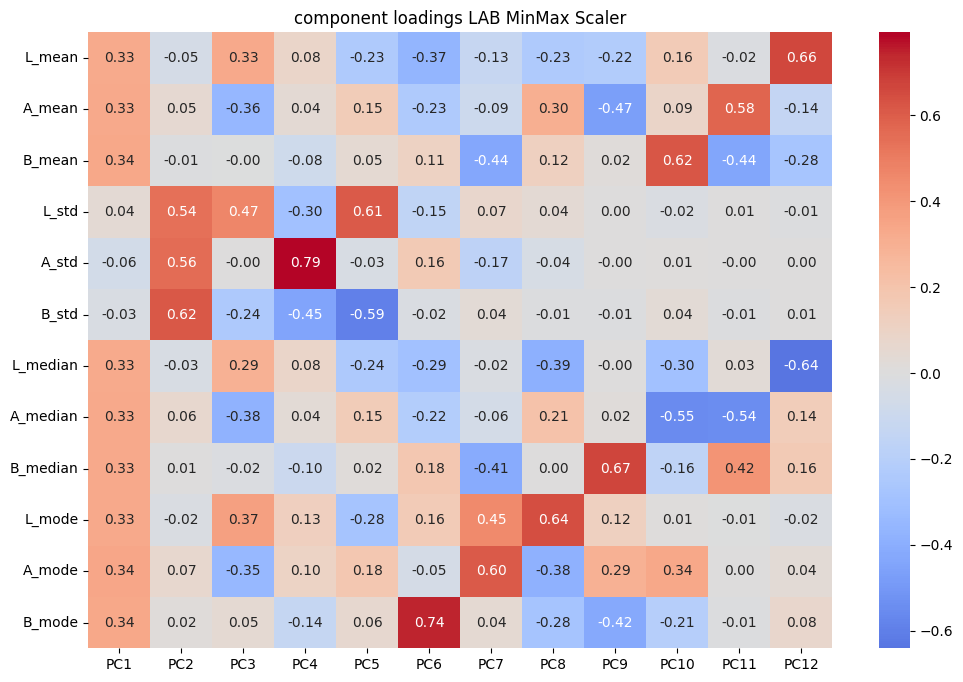

In [87]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings LAB MinMax Scaler")
plt.show()

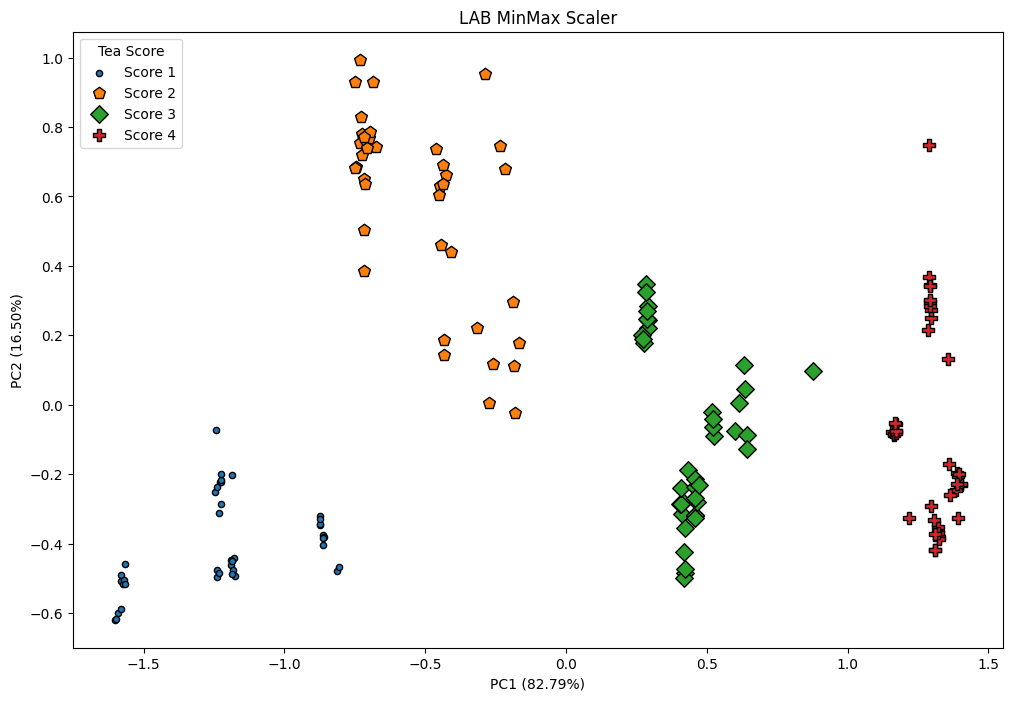

In [88]:
minmax_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_lab_pca_df[minmax_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

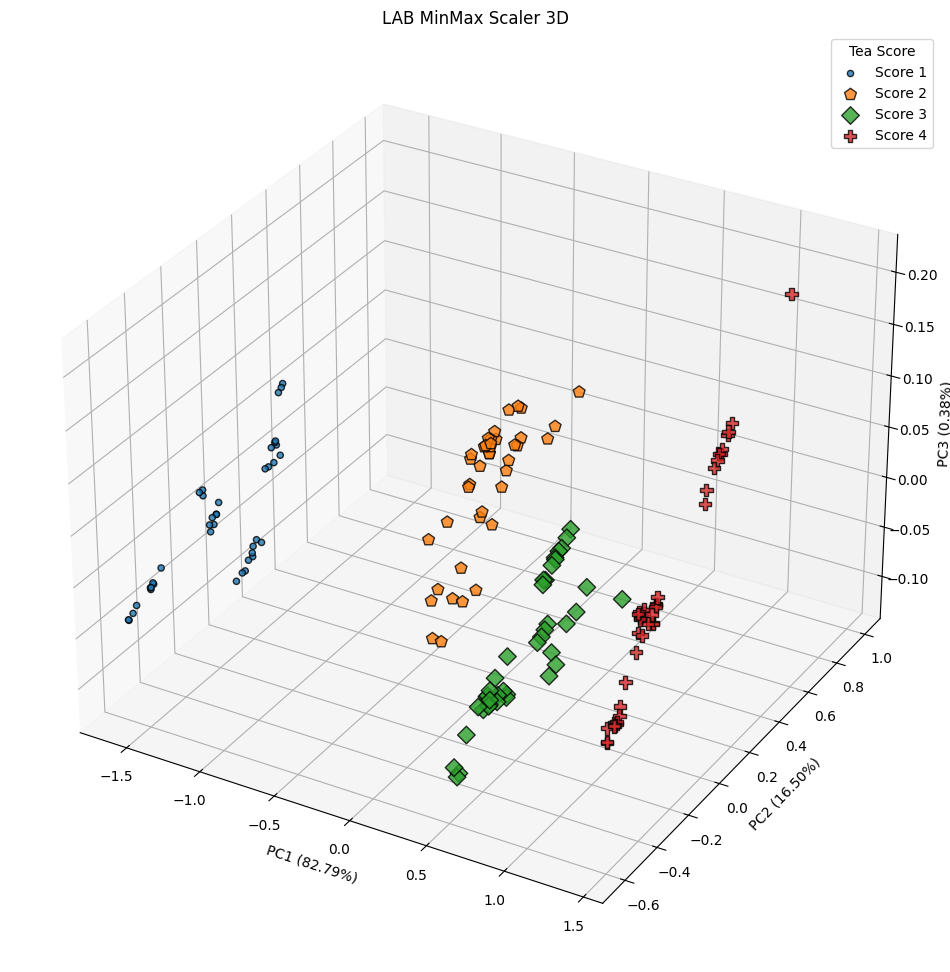

In [89]:
encoded_label_lab = encoder.fit_transform(lab_label)

minmax_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = minmax_lab_pca_df[minmax_lab_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("LAB MinMax Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [90]:
maxed_lab = maxabs_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_lab)
maxabs_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 70.46%
explained variance PC2: 28.79%
explained variance PC3: 0.33%
explained variance PC4: 0.30%
explained variance PC5: 0.07%
explained variance PC6: 0.03%
explained variance PC7: 0.01%
explained variance PC8: 0.00%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [91]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings LAB MaxAbs Scaler.csv")

PCA component loadings LAB_Standard scaled
        L_mean    A_mean    B_mean     L_std     A_std     B_std  L_median  \
PC1   0.519799  0.161704  0.161891  0.029937 -0.119955 -0.079548  0.520265   
PC2   0.023910  0.040523  0.020709  0.573570  0.515320  0.626644  0.038992   
PC3  -0.089113  0.228255  0.115305 -0.439744 -0.372828  0.665156 -0.040889   
PC4  -0.005028  0.126746  0.018617 -0.600374  0.756244 -0.106458  0.026726   
PC5  -0.171332  0.393241  0.206639  0.335019  0.011135 -0.382720 -0.139050   
PC6  -0.481967 -0.021079  0.021555  0.005335 -0.033165 -0.015653 -0.391855   
PC7   0.014631 -0.212361  0.358647 -0.060604  0.088363 -0.004101  0.026499   
PC8  -0.433996 -0.278378 -0.290972  0.004870 -0.010193 -0.008026  0.591664   
PC9   0.487555 -0.086508 -0.132716 -0.016933  0.001590  0.018731 -0.405673   
PC10  0.091433 -0.480009  0.149440 -0.006276  0.003103  0.004964 -0.144701   
PC11 -0.157627  0.285768  0.654853 -0.001853  0.001517  0.006267  0.127295   
PC12  0.011868  0.553

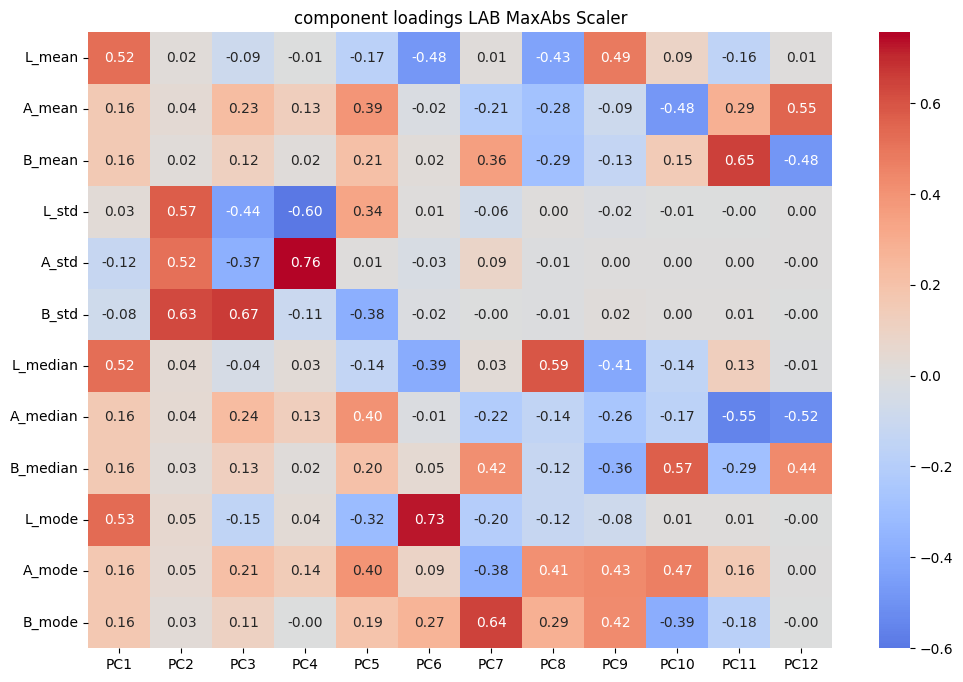

In [92]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings LAB MaxAbs Scaler")
plt.show()

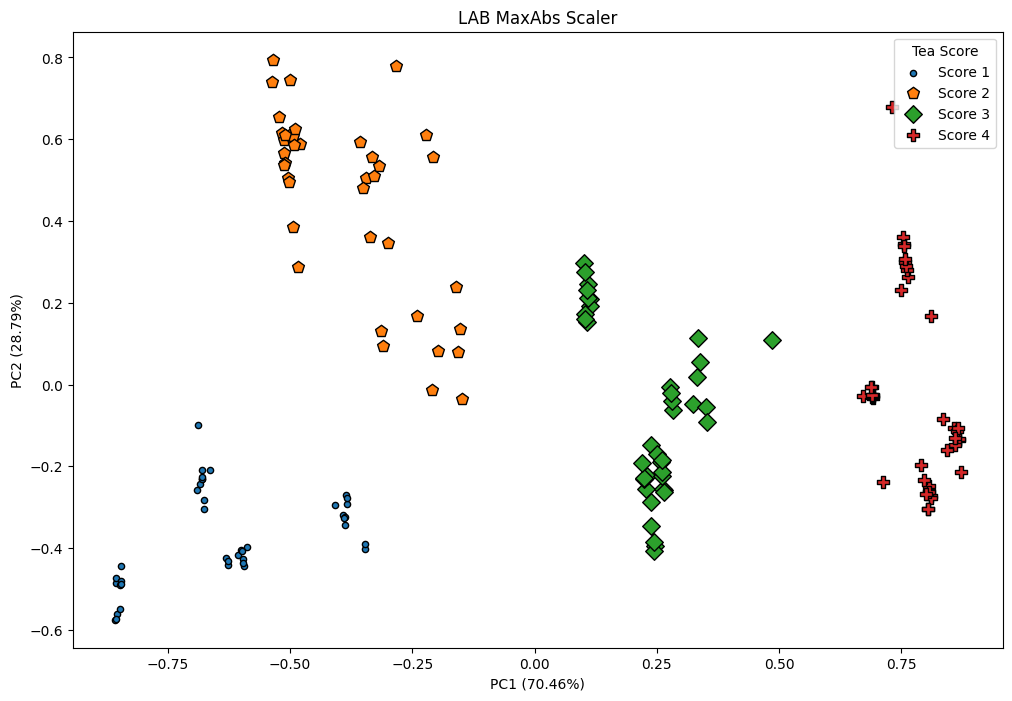

In [93]:
maxabs_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_lab_pca_df[maxabs_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

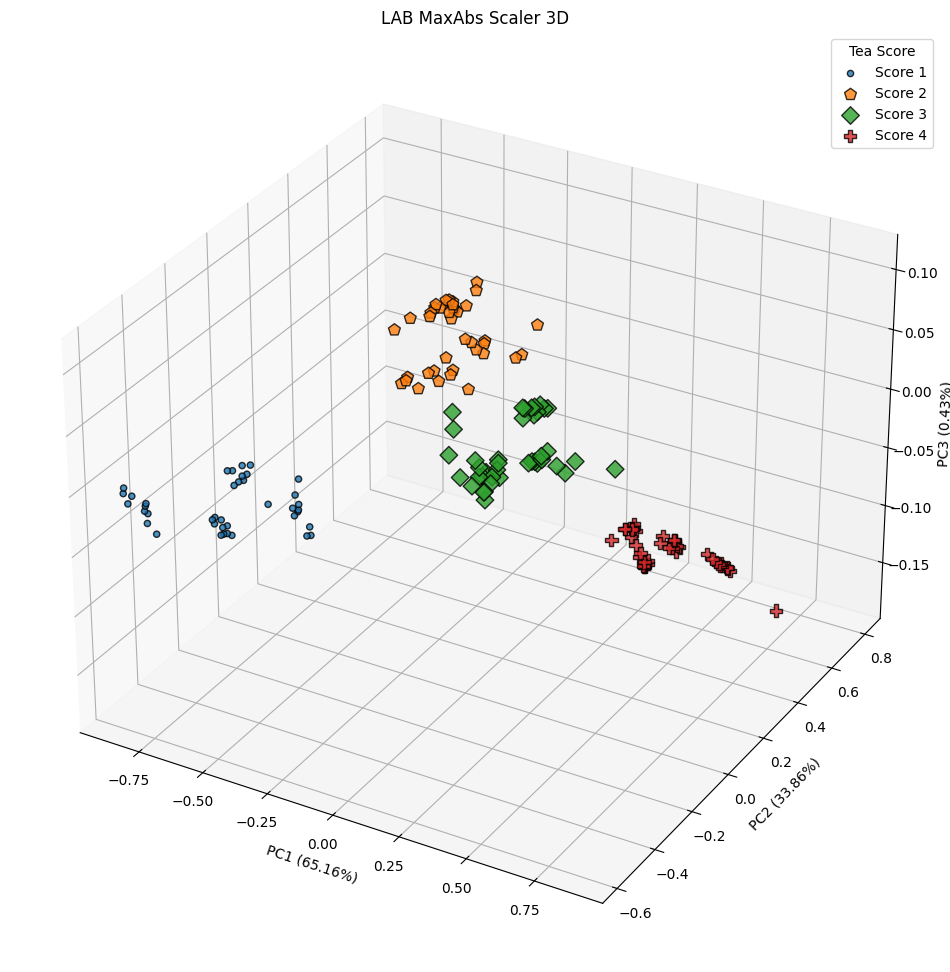

In [95]:
encoded_label_lab = encoder.fit_transform(lab_label)

maxabs_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = maxabs_lab_pca_df[maxabs_lab_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("LAB MaxAbs Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [96]:
robust_scaled_lab = robust_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_lab)
robust_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 65.16%
explained variance PC2: 33.86%
explained variance PC3: 0.43%
explained variance PC4: 0.40%
explained variance PC5: 0.09%
explained variance PC6: 0.03%
explained variance PC7: 0.01%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


In [97]:
df = all_data_frames.drop(columns=['class label'])
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings LAB Robust Scaler.csv")

PCA component loadings LAB_Standard scaled
        L_mean    A_mean    B_mean     L_std     A_std     B_std  L_median  \
PC1   0.319423  0.330553  0.320147  0.031295 -0.157295 -0.078772  0.331239   
PC2   0.007520  0.068406  0.031041  0.481910  0.621727  0.598518  0.016382   
PC3   0.120585 -0.033189 -0.022241 -0.161086  0.727933 -0.621204  0.117239   
PC4   0.222793 -0.297601 -0.004133  0.685392 -0.206488 -0.243195  0.201394   
PC5  -0.311679  0.253902  0.025465  0.509687 -0.047557 -0.434759 -0.319208   
PC6  -0.364751 -0.228096  0.132070 -0.090233  0.080427 -0.021514 -0.312062   
PC7  -0.145206 -0.095788 -0.428041  0.045164 -0.084156  0.020543 -0.038397   
PC8  -0.221102  0.303647  0.119207  0.027332 -0.018617 -0.006726 -0.394468   
PC9  -0.222281 -0.470167  0.006104  0.002400 -0.000437 -0.006251 -0.004165   
PC10  0.170371  0.118562  0.605832 -0.016389  0.005298  0.022319 -0.299567   
PC11 -0.050318  0.573031 -0.470521  0.006219 -0.000837 -0.006207  0.063866   
PC12  0.672763 -0.122

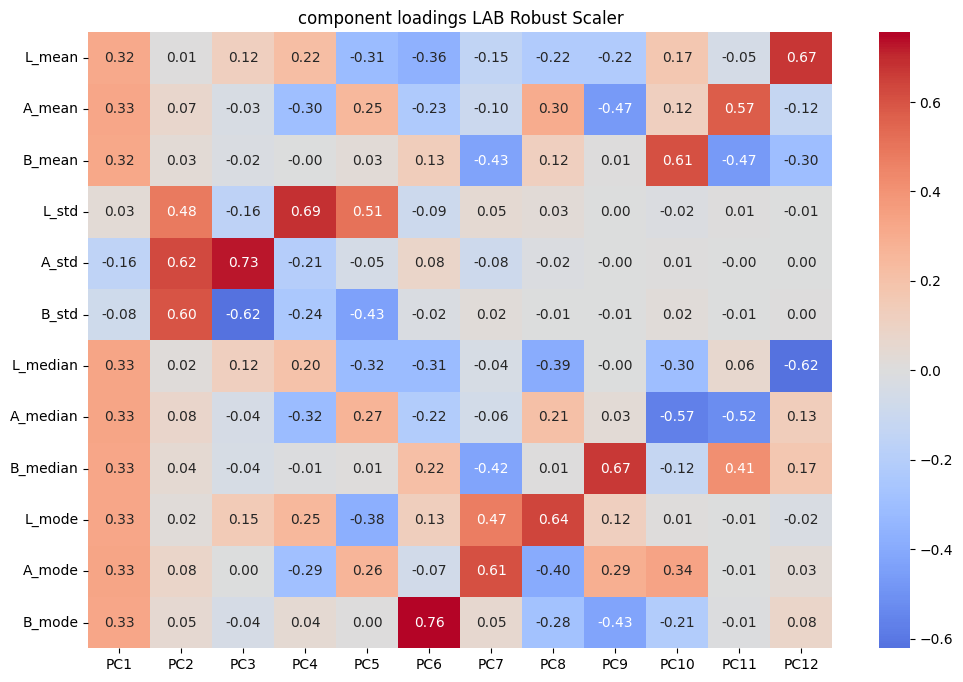

In [98]:
component_loadings = component_loadings.T

plt.figure(figsize=(12,8))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings LAB Robust Scaler")
plt.show()

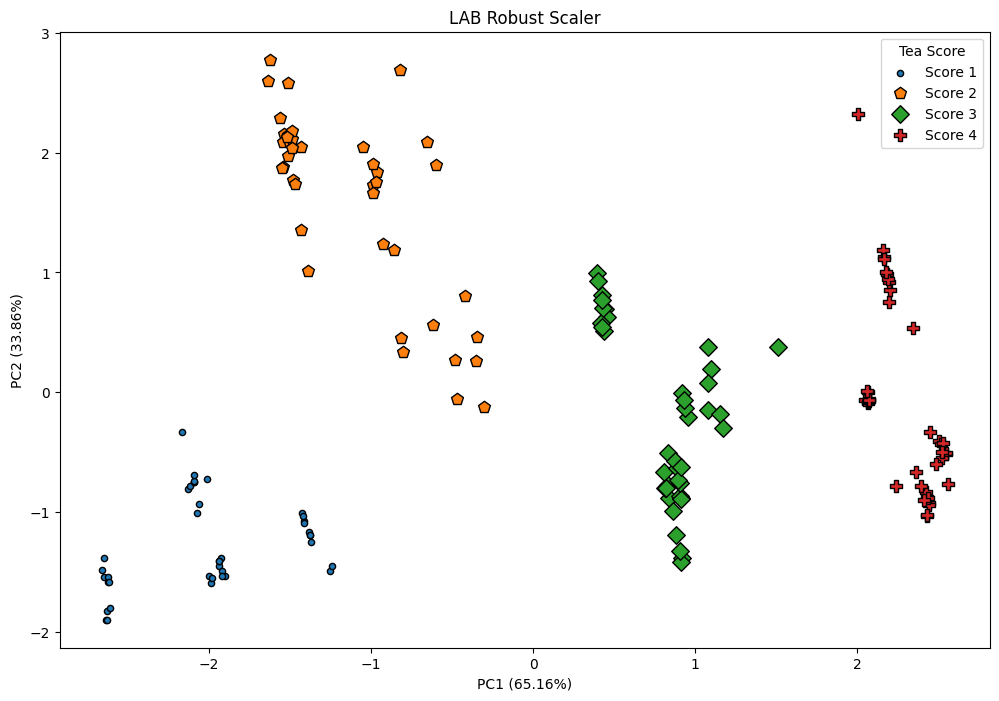

In [99]:
robust_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_lab_pca_df[robust_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

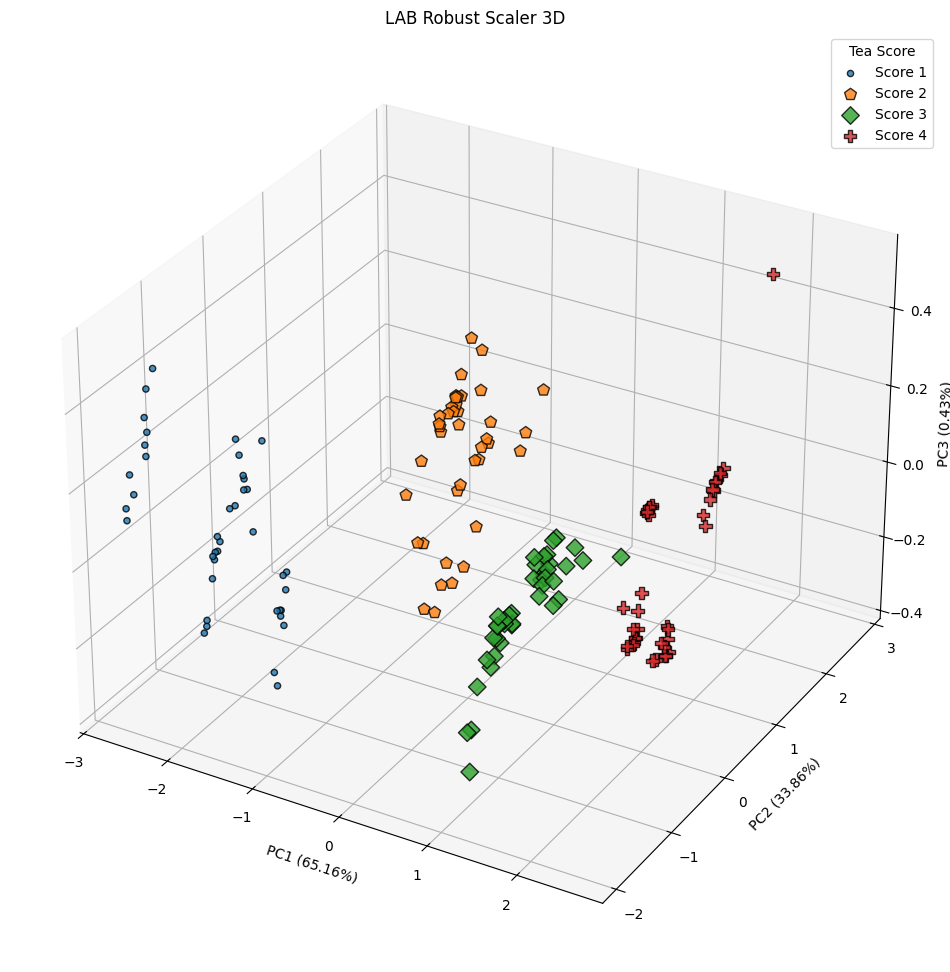

In [100]:
encoded_label_lab = encoder.fit_transform(lab_label)

robust_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = robust_lab_pca_df[robust_lab_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("LAB Robust Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

# All Color Space

In [101]:
all_color_features = np.hstack([rgb_feature, hsv_feature, lab_feature])
all_color_df = pd.DataFrame(all_color_features)

all_color_columns = np.hstack([df_rgb.columns, df_hsv.columns, df_lab.columns])
all_color_table = pd.DataFrame(all_color_features, columns=all_color_columns)

print(all_color_df.shape)

(160, 36)


## Standard Scaler

In [102]:
standard_scaled_all = standard_scaler.fit_transform(all_color_df)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_all)

columns = []
for i in range(0, 12):
    elements = f'PC{i+1}'
    columns.append(elements)

standard_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 64.74%
explained variance PC2: 21.80%
explained variance PC3: 9.38%
explained variance PC4: 2.09%
explained variance PC5: 0.62%
explained variance PC6: 0.47%
explained variance PC7: 0.35%
explained variance PC8: 0.24%
explained variance PC9: 0.13%
explained variance PC10: 0.05%
explained variance PC11: 0.04%
explained variance PC12: 0.03%


In [103]:
component_loadings = pd.DataFrame(pca.components_, columns=all_color_columns, index=[f'PC{i+1}' for i in range(12)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings All Color Standard Scaler.csv")

PCA component loadings LAB_Standard scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1  -0.174034  0.089884  0.198788 -0.157528 -0.034317  0.090921 -0.173443   
PC2   0.159400  0.297423  0.098802  0.131309  0.188335 -0.230917  0.149552   
PC3   0.084382  0.177800  0.004678  0.192690  0.376676  0.334903  0.069136   
PC4  -0.279523  0.044660  0.007886 -0.274354  0.410492  0.013423 -0.326297   
PC5  -0.149365 -0.072690 -0.015984  0.549501 -0.050820 -0.133812 -0.285523   
PC6   0.125874 -0.096503  0.040479  0.406083  0.553254 -0.040533  0.119034   
PC7  -0.085145  0.064123 -0.113634 -0.203192  0.515884 -0.119711 -0.081605   
PC8   0.134327  0.097251 -0.028169  0.120013 -0.082037 -0.015283  0.118682   
PC9  -0.012282  0.285680  0.022716 -0.053736 -0.149739 -0.255149 -0.073620   
PC10  0.014016 -0.141451  0.077267 -0.267076  0.203760 -0.199636  0.064821   
PC11 -0.011531 -0.093848  0.002767 -0.233331  0.029327 -0.108985  0.052404   
PC12  0.109945  0.021

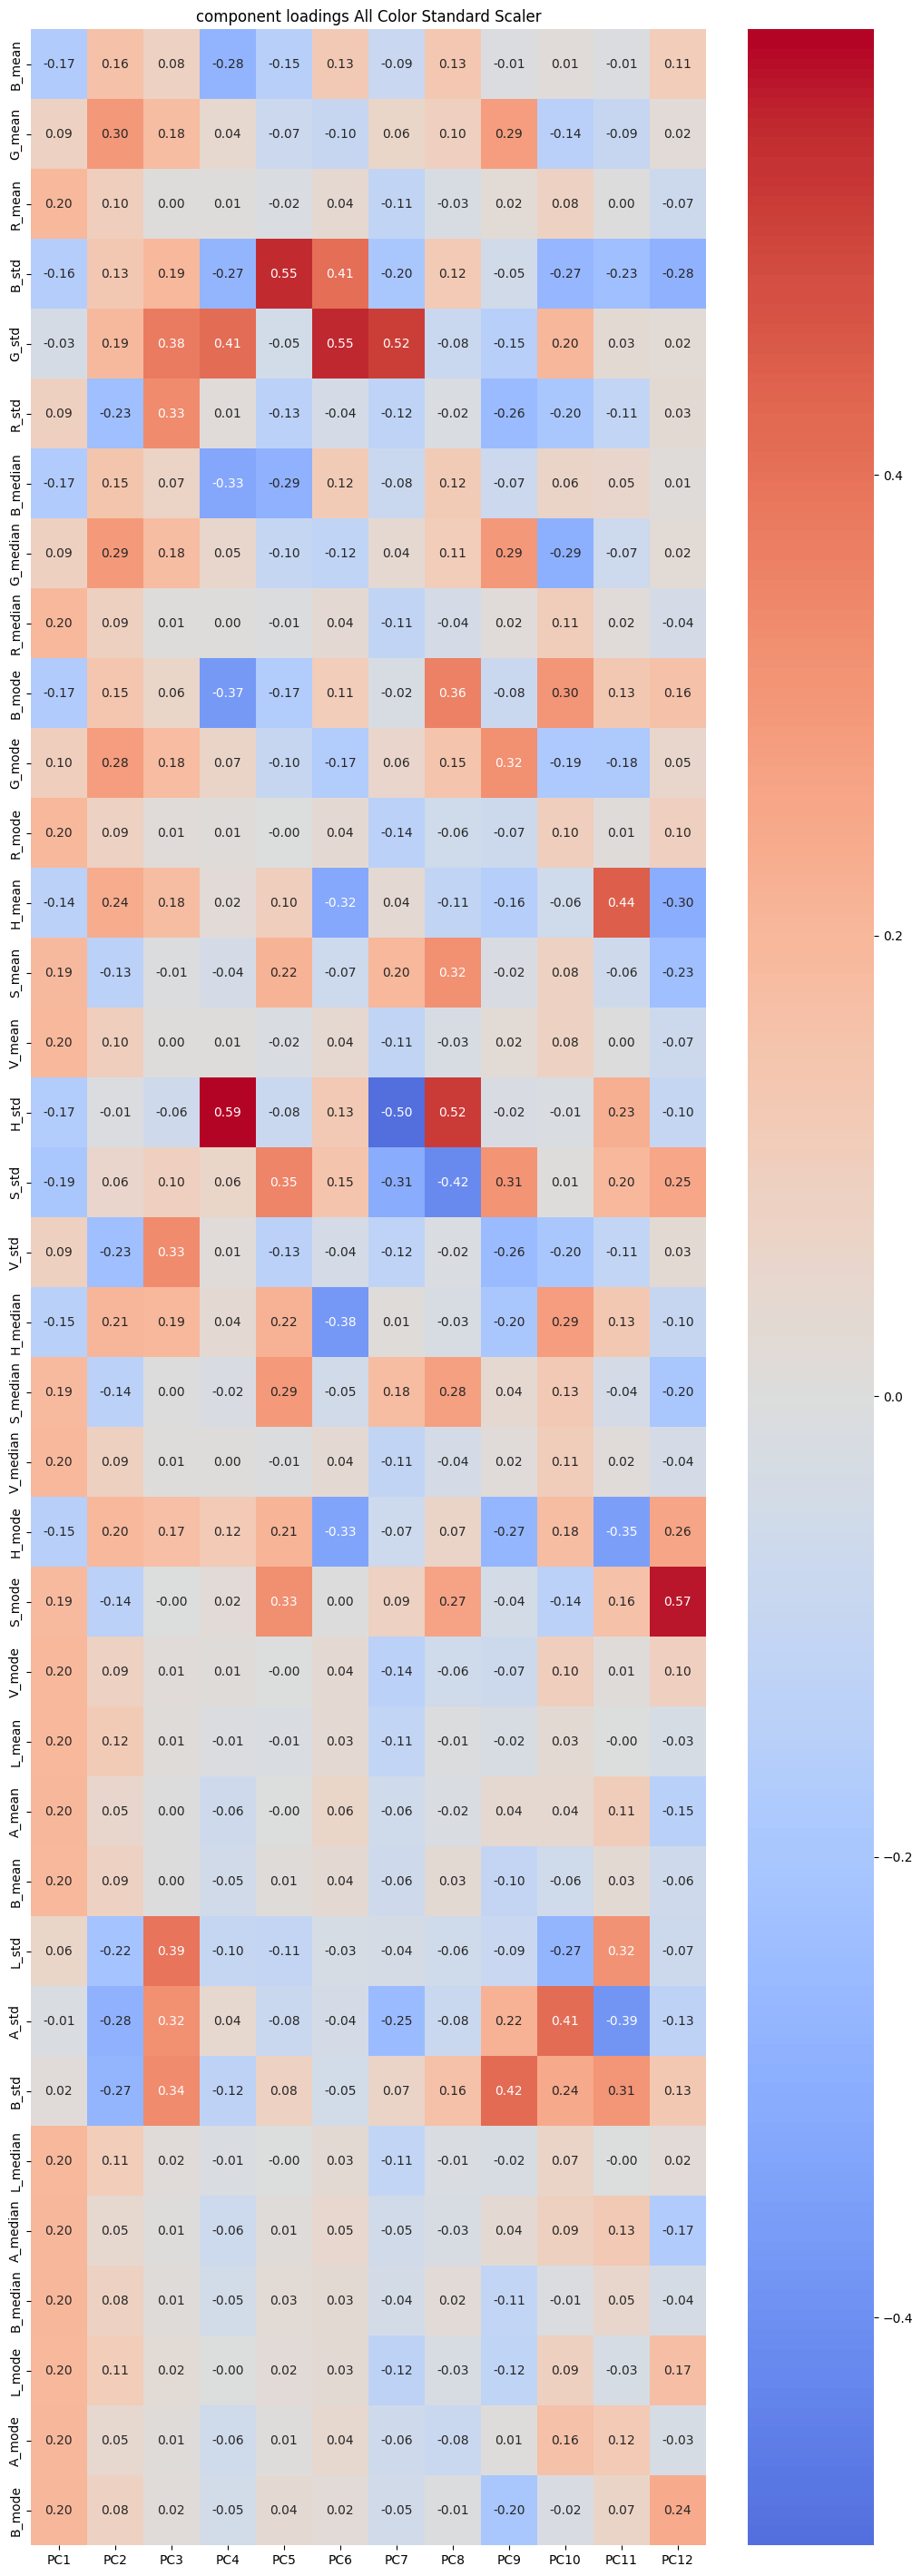

In [104]:
component_loadings = component_loadings.T

plt.figure(figsize=(12, 36))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings All Color Standard Scaler")
plt.show()

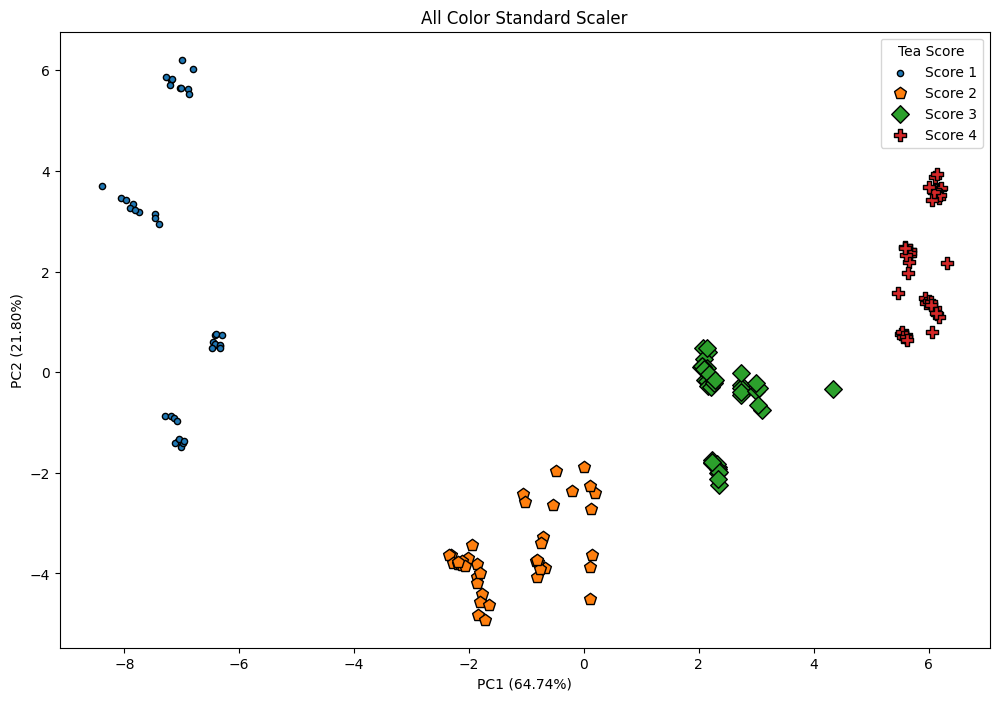

In [105]:
standard_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_all_pca_df[standard_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

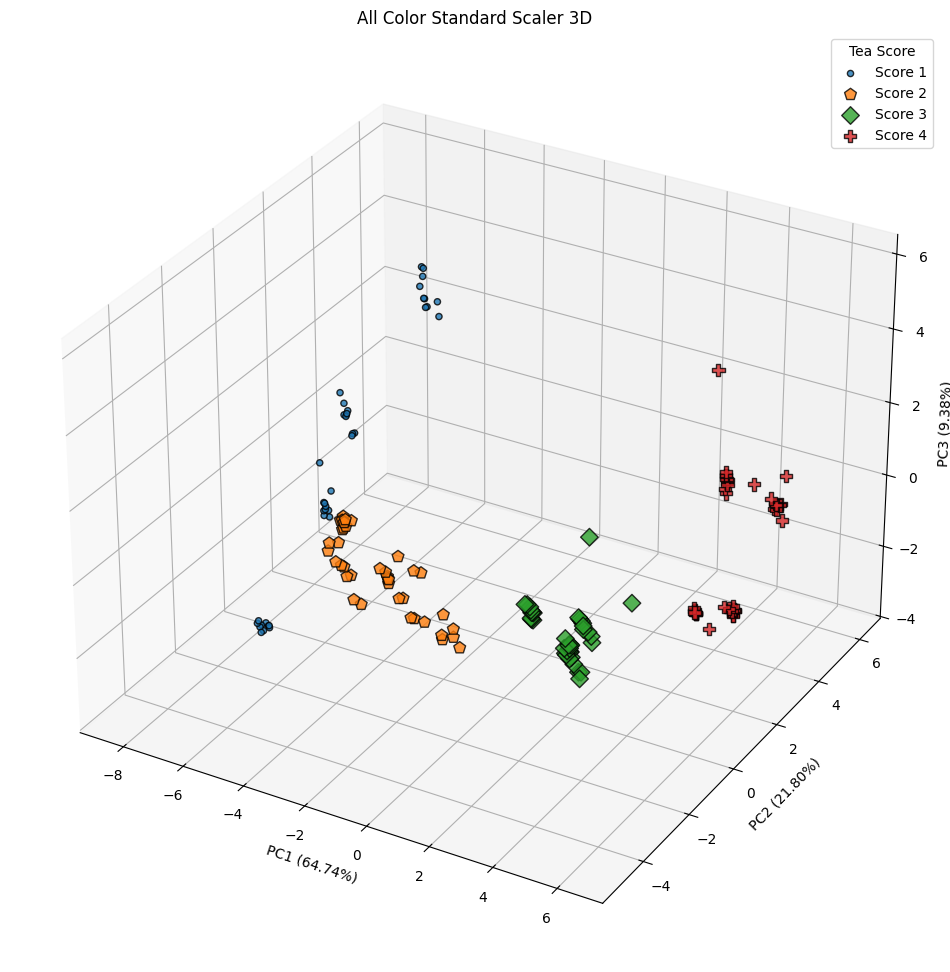

In [106]:
standard_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = standard_all_pca_df[standard_all_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("All Color Standard Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [107]:
minmaxed_all_color = minmax_scaler.fit_transform(all_color_df)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_all_color)

columns = []
for i in range(0, 12):
    elements = f'PC{i+1}'
    columns.append(elements)

minmax_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 71.91%
explained variance PC2: 18.49%
explained variance PC3: 6.70%
explained variance PC4: 1.33%
explained variance PC5: 0.54%
explained variance PC6: 0.34%
explained variance PC7: 0.24%
explained variance PC8: 0.17%
explained variance PC9: 0.11%
explained variance PC10: 0.04%
explained variance PC11: 0.03%
explained variance PC12: 0.03%


In [108]:
component_loadings = pd.DataFrame(pca.components_, columns=all_color_columns, index=[f'PC{i+1}' for i in range(12)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings All Color MinMax Scaler.csv")

PCA component loadings LAB_Standard scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1  -0.136261  0.090817  0.213886 -0.113559 -0.016571  0.065480 -0.134078   
PC2   0.167681  0.294743  0.092135  0.127966  0.135966 -0.216841  0.156312   
PC3   0.088435  0.193511  0.001518  0.182715  0.280919  0.333469  0.072294   
PC4  -0.307798  0.069449  0.020070 -0.268511  0.326024  0.033723 -0.356230   
PC5  -0.104664 -0.033149 -0.047401  0.425753 -0.061661 -0.159593 -0.218105   
PC6   0.086932 -0.144404  0.082309  0.510068  0.215914  0.003913  0.040405   
PC7   0.091281  0.151313 -0.059717  0.116301  0.645453 -0.096350  0.081134   
PC8   0.186947  0.016632  0.025786  0.114250 -0.388907  0.058130  0.192621   
PC9  -0.019244  0.278645  0.050590 -0.065642 -0.278653 -0.246141 -0.071769   
PC10  0.024908  0.105013 -0.082013 -0.010274 -0.210708  0.129186 -0.010754   
PC11  0.006648 -0.146715  0.019019 -0.313271  0.153798 -0.171636  0.101759   
PC12  0.122558  0.009

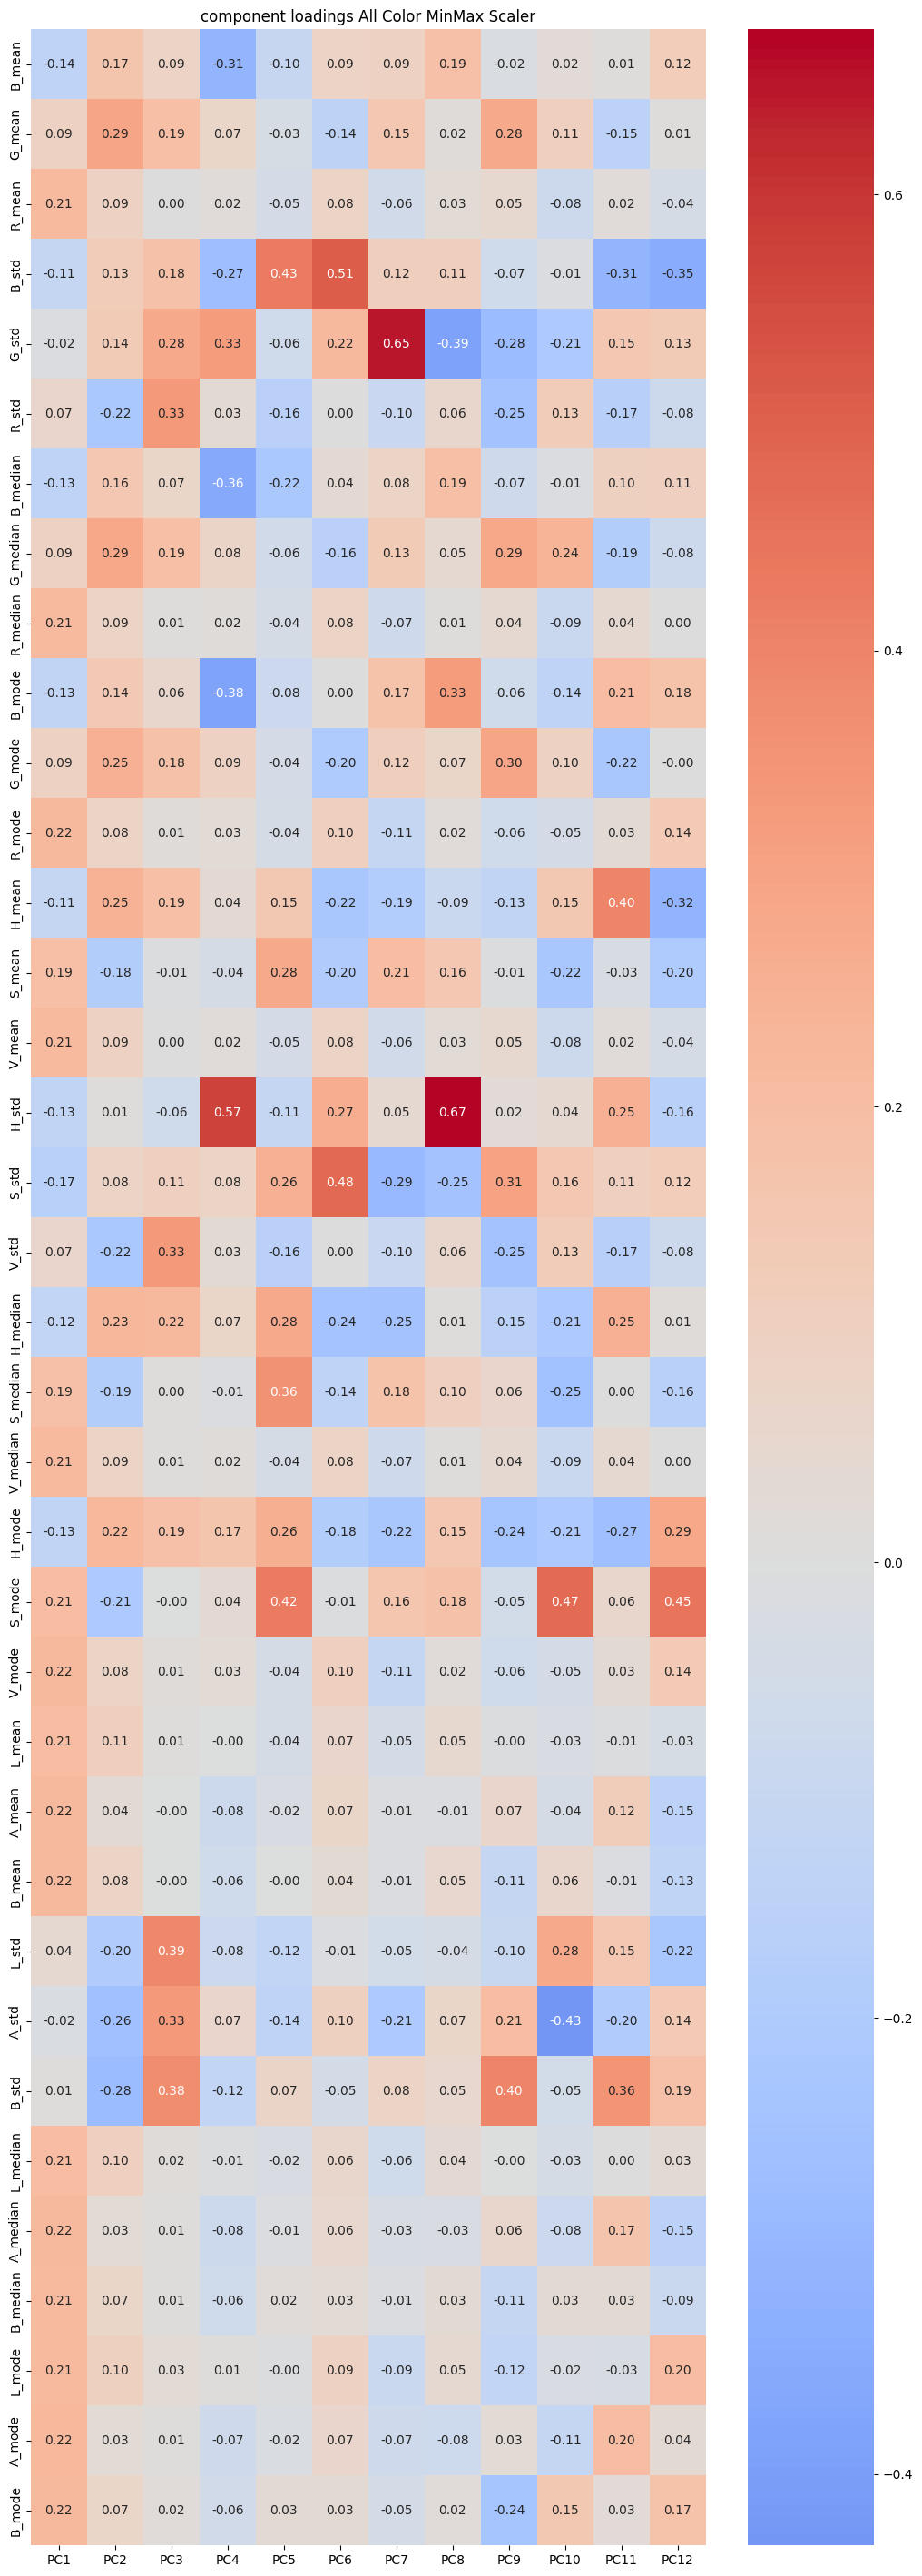

In [109]:
component_loadings = component_loadings.T

plt.figure(figsize=(12, 36))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings All Color MinMax Scaler")
plt.show()

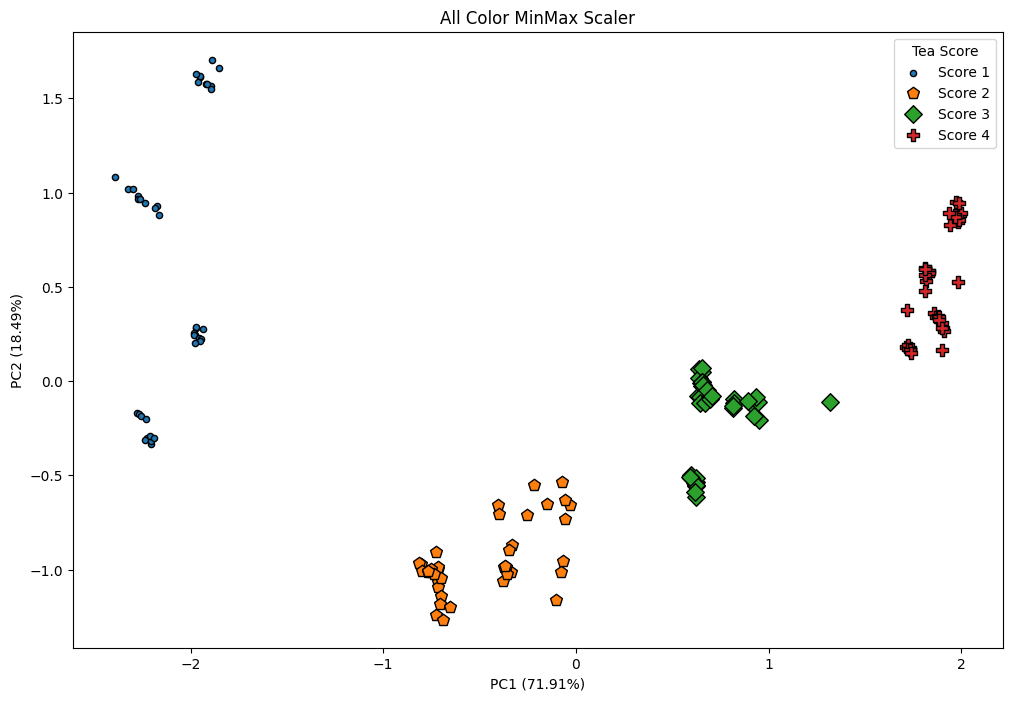

In [110]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

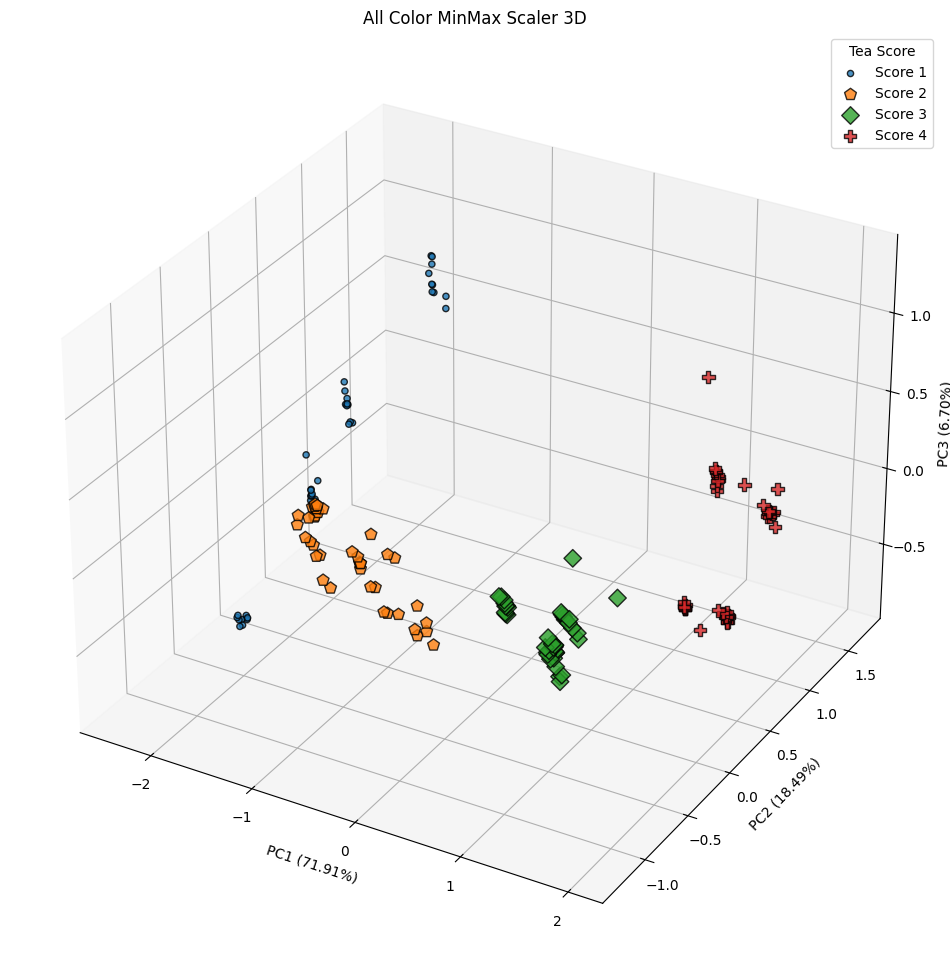

In [111]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("All Color MinMax Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [112]:
maxed_all_color = maxabs_scaler.fit_transform(all_color_df)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_all_color)

columns = []
for i in range(0, 12):
    elements = f'PC{i+1}'
    columns.append(elements)

maxabs_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 67.76%
explained variance PC2: 20.13%
explained variance PC3: 8.46%
explained variance PC4: 2.04%
explained variance PC5: 0.54%
explained variance PC6: 0.38%
explained variance PC7: 0.27%
explained variance PC8: 0.14%
explained variance PC9: 0.12%
explained variance PC10: 0.04%
explained variance PC11: 0.04%
explained variance PC12: 0.03%


In [113]:
component_loadings = pd.DataFrame(pca.components_, columns=all_color_columns, index=[f'PC{i+1}' for i in range(12)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings All Color MaxAbs Scaler.csv")

PCA component loadings LAB_Standard scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1  -0.180814  0.109957  0.267835 -0.127714 -0.013022  0.070571 -0.185082   
PC2  -0.231794 -0.274156 -0.074143 -0.145707 -0.131986  0.271993 -0.226230   
PC3   0.148748  0.220859  0.011415  0.210292  0.304082  0.306869  0.133972   
PC4  -0.270461  0.089788 -0.007707 -0.164122  0.353770  0.023567 -0.344041   
PC5  -0.120052 -0.131863  0.037658  0.558716 -0.088552 -0.102054 -0.265744   
PC6   0.229251 -0.127703  0.100202  0.252977  0.115353  0.073484  0.273940   
PC7  -0.036549  0.022002 -0.042236  0.118967  0.790688 -0.091000 -0.055326   
PC8  -0.068480  0.083821 -0.017386  0.399978 -0.092887 -0.122380 -0.256673   
PC9   0.025410  0.256014  0.050314 -0.231448 -0.157793 -0.249729  0.027438   
PC10 -0.035096 -0.177932  0.043787 -0.379090  0.271421 -0.197037 -0.029580   
PC11  0.058820  0.077286 -0.011637  0.147434  0.038555  0.037983 -0.037944   
PC12 -0.026355 -0.032

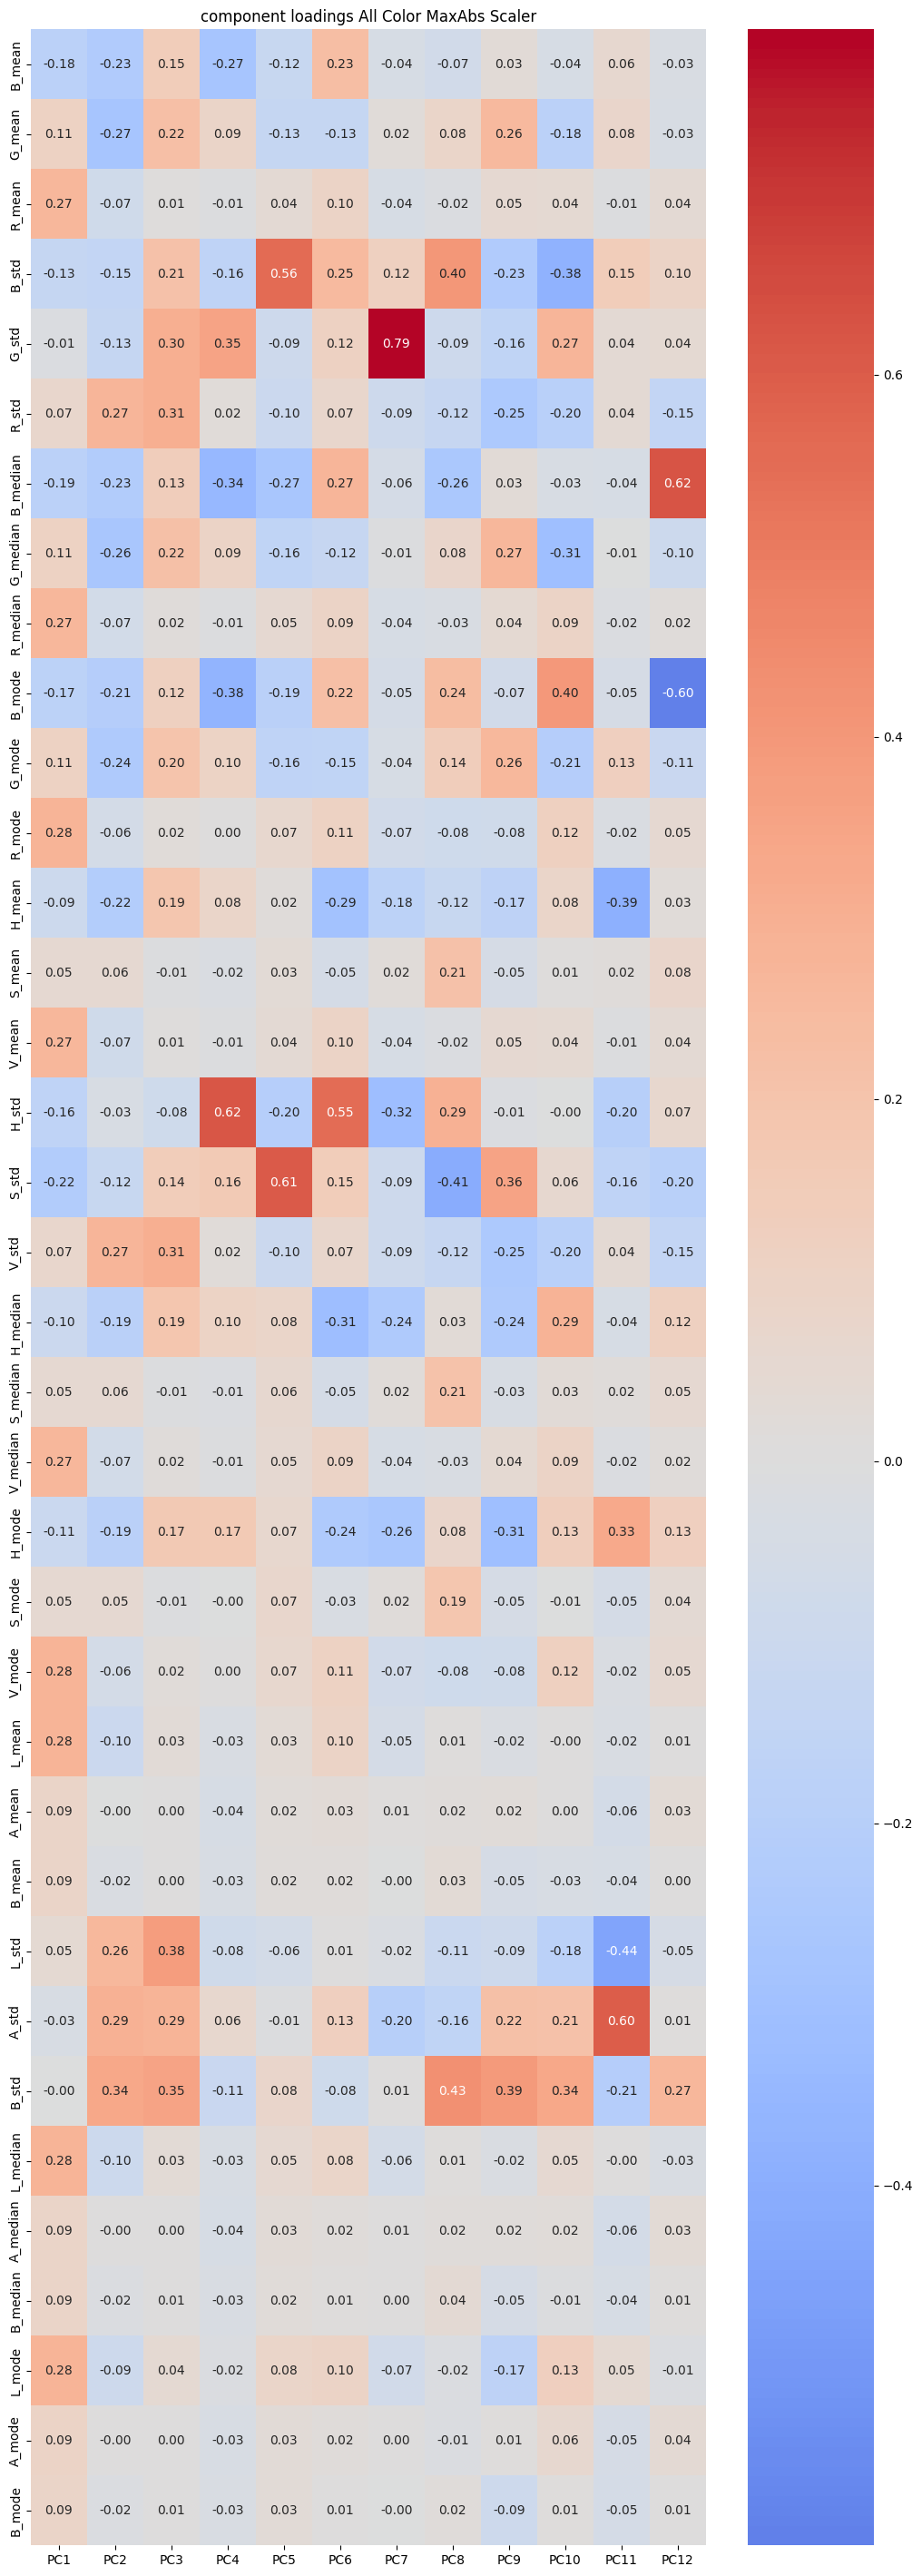

In [114]:
component_loadings = component_loadings.T

plt.figure(figsize=(12, 36))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings All Color MaxAbs Scaler")
plt.show()

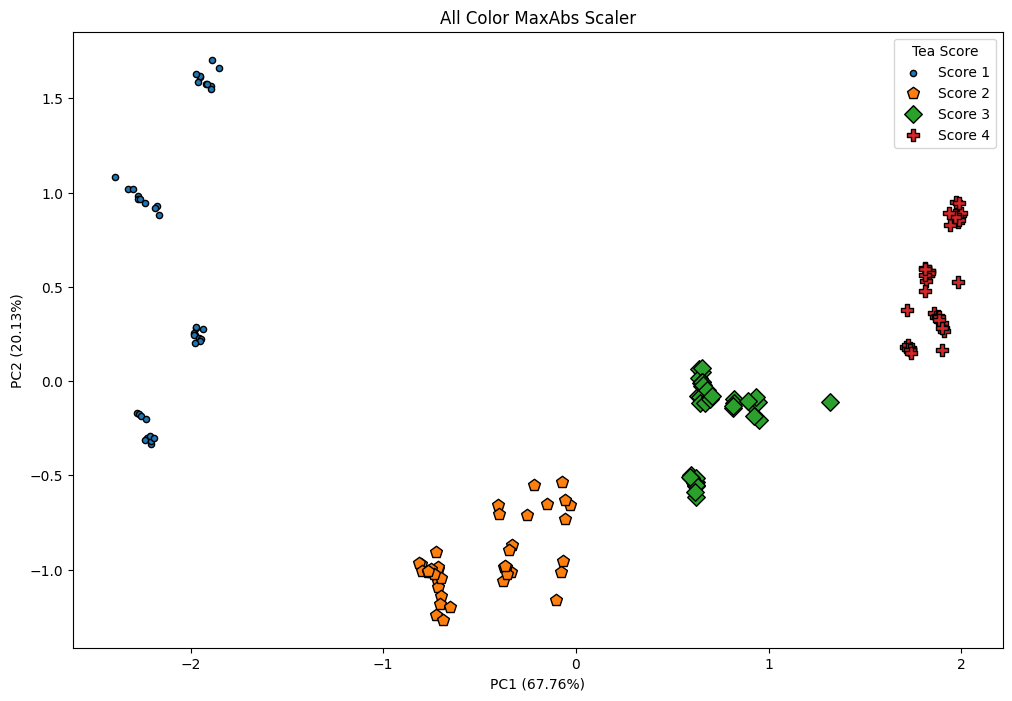

In [115]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

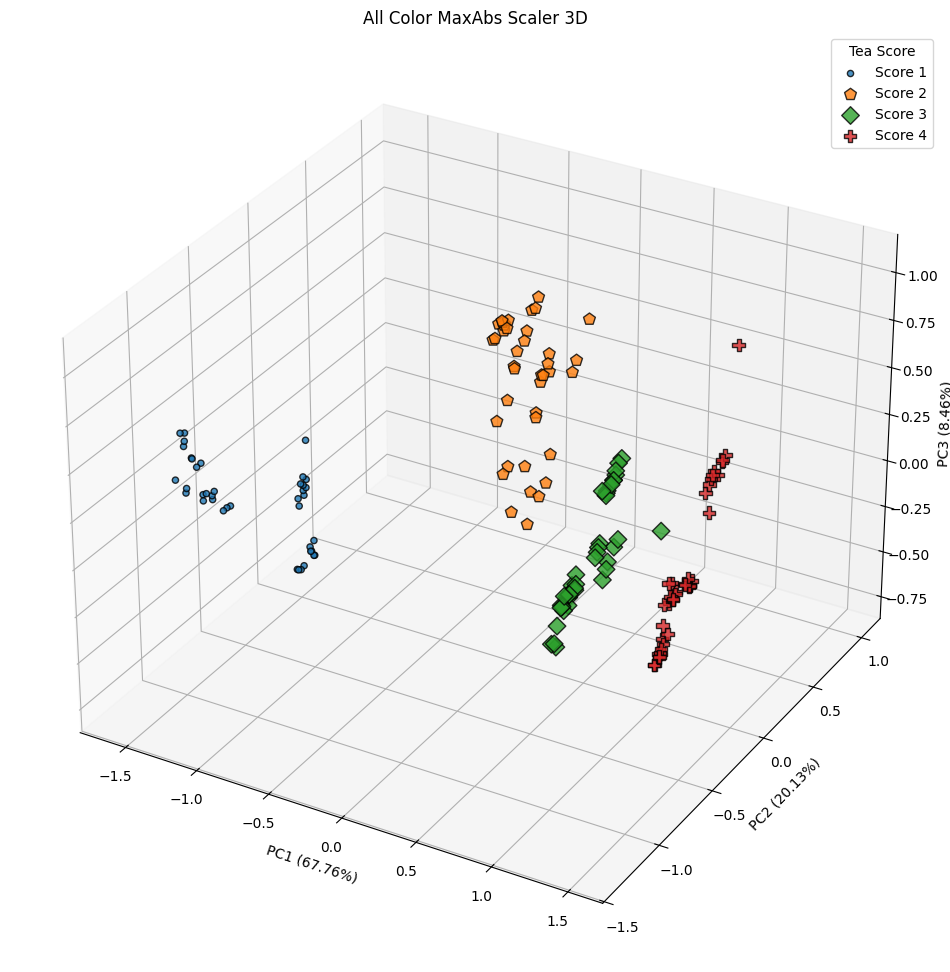

In [116]:
maxabs_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = maxabs_all_pca_df[maxabs_all_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("All Color MaxAbs Scaler 3D")
ax.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [117]:
robust_scaled_all_color = robust_scaler.fit_transform(all_color_df)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_all_color)

columns = []
for i in range(0, 12):
    elements = f'PC{i+1}'
    columns.append(elements)

robust_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 72.13%
explained variance PC2: 15.55%
explained variance PC3: 6.86%
explained variance PC4: 3.00%
explained variance PC5: 0.98%
explained variance PC6: 0.59%
explained variance PC7: 0.29%
explained variance PC8: 0.25%
explained variance PC9: 0.08%
explained variance PC10: 0.06%
explained variance PC11: 0.05%
explained variance PC12: 0.04%


In [118]:
component_loadings = pd.DataFrame(pca.components_, columns=all_color_columns, index=[f'PC{i+1}' for i in range(12)])

print('PCA component loadings LAB_Standard scaled')
print(component_loadings)

component_loadings.to_csv("component loadings All Color Robust Scaler.csv")

PCA component loadings LAB_Standard scaled
        B_mean    G_mean    R_mean     B_std     G_std     R_std  B_median  \
PC1   0.347536 -0.009246 -0.100199  0.239521  0.059244 -0.074603  0.323132   
PC2   0.093870  0.277991  0.168247  0.061499  0.158875 -0.100845  0.068992   
PC3   0.044865  0.089931  0.007719  0.246219  0.271055  0.308541  0.013027   
PC4  -0.312610  0.048849 -0.021648 -0.204251  0.276159 -0.007766 -0.374035   
PC5  -0.095321 -0.095831 -0.046951  0.595885 -0.182975 -0.164664 -0.251084   
PC6   0.088094  0.023408  0.055757  0.512089  0.462626 -0.006848  0.006851   
PC7   0.100958  0.072503 -0.018834 -0.214418  0.002167 -0.000706  0.099764   
PC8  -0.036912  0.039017 -0.112771 -0.139971  0.684972 -0.111880 -0.039632   
PC9   0.077332  0.293083  0.007897  0.011387 -0.191948 -0.267094 -0.229325   
PC10 -0.079252 -0.115709  0.043518 -0.019323  0.089761  0.046752 -0.608447   
PC11  0.030725 -0.048540 -0.008385 -0.081505 -0.039756  0.021303 -0.139131   
PC12  0.237926  0.080

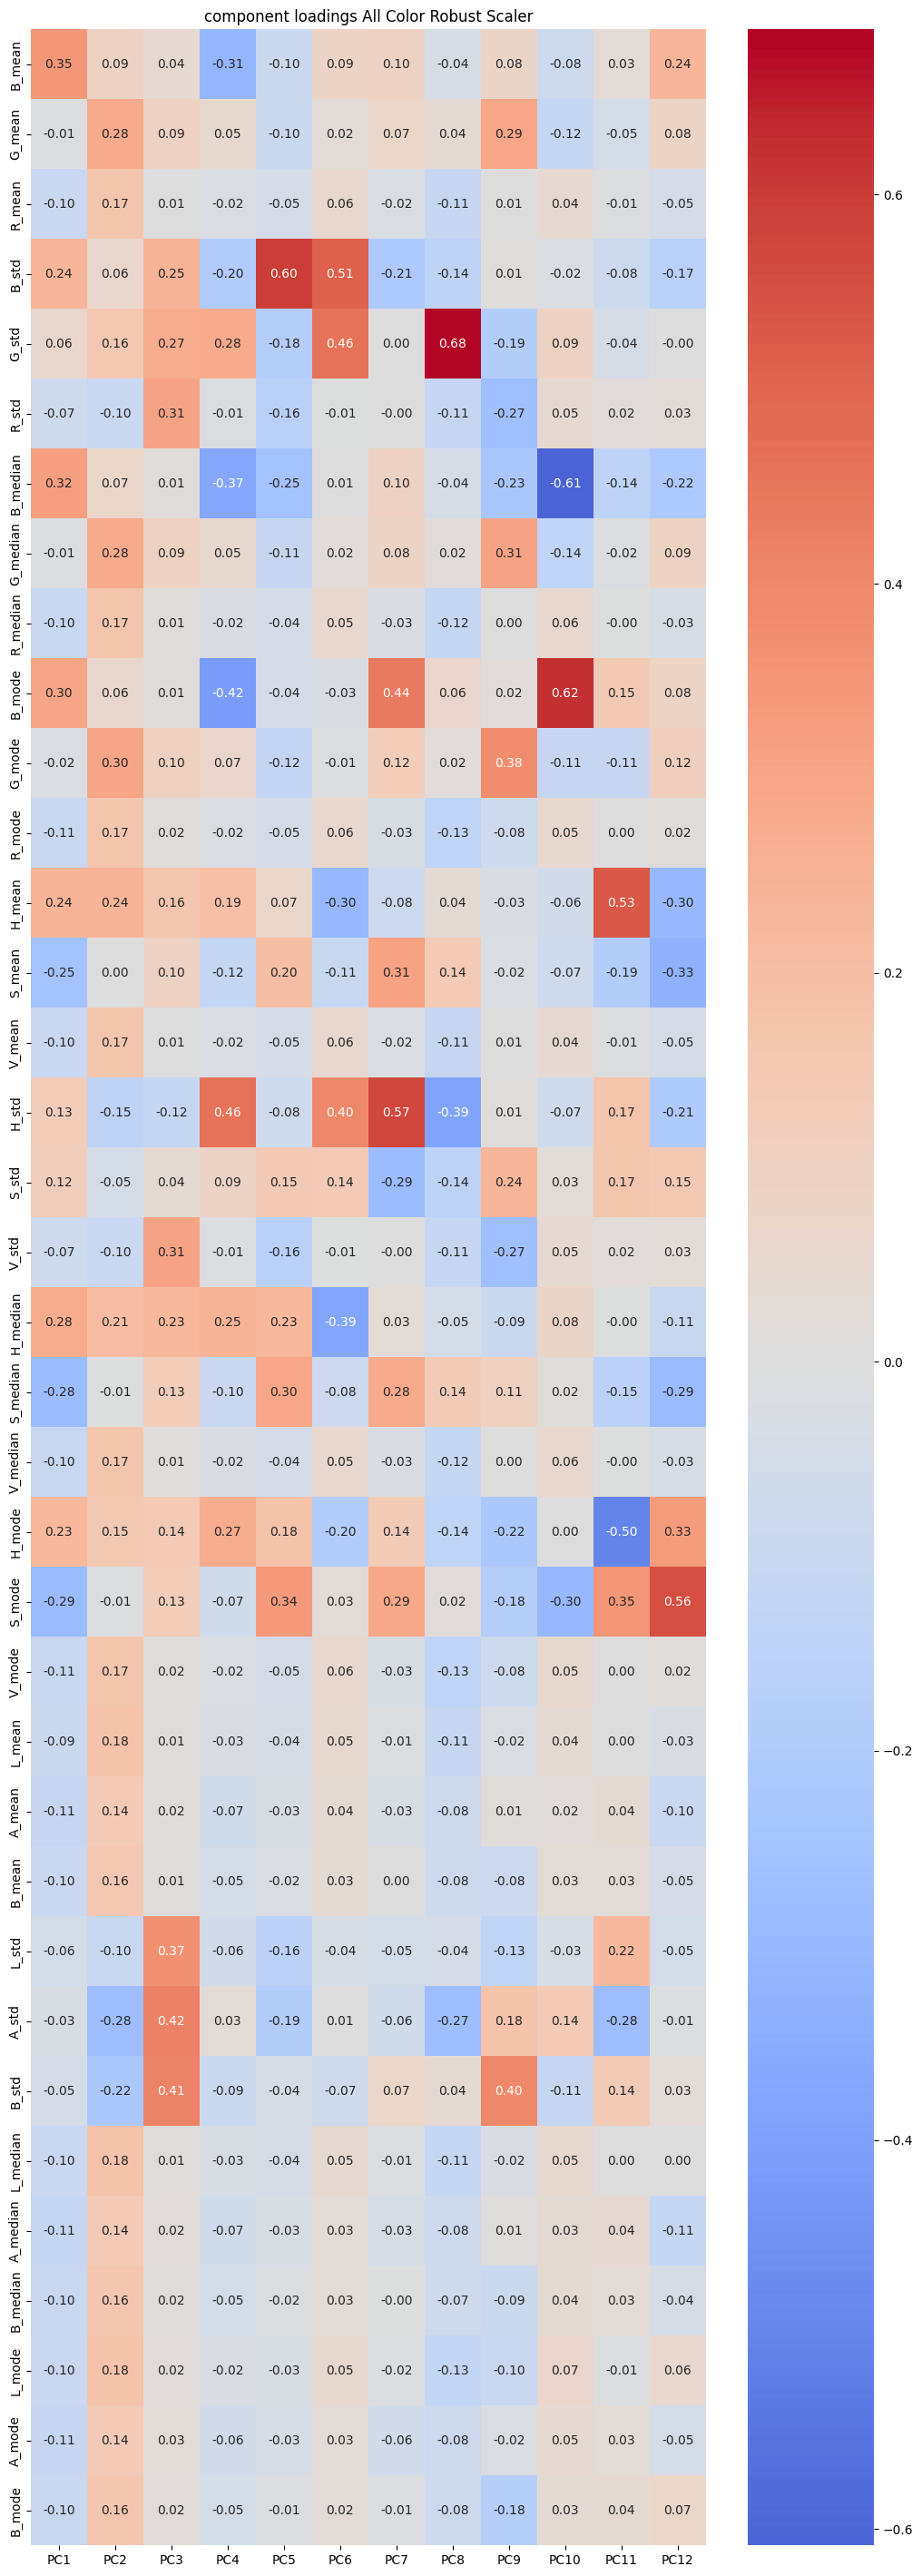

In [119]:
component_loadings = component_loadings.T

plt.figure(figsize=(12, 36))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("component loadings All Color Robust Scaler")
plt.show()

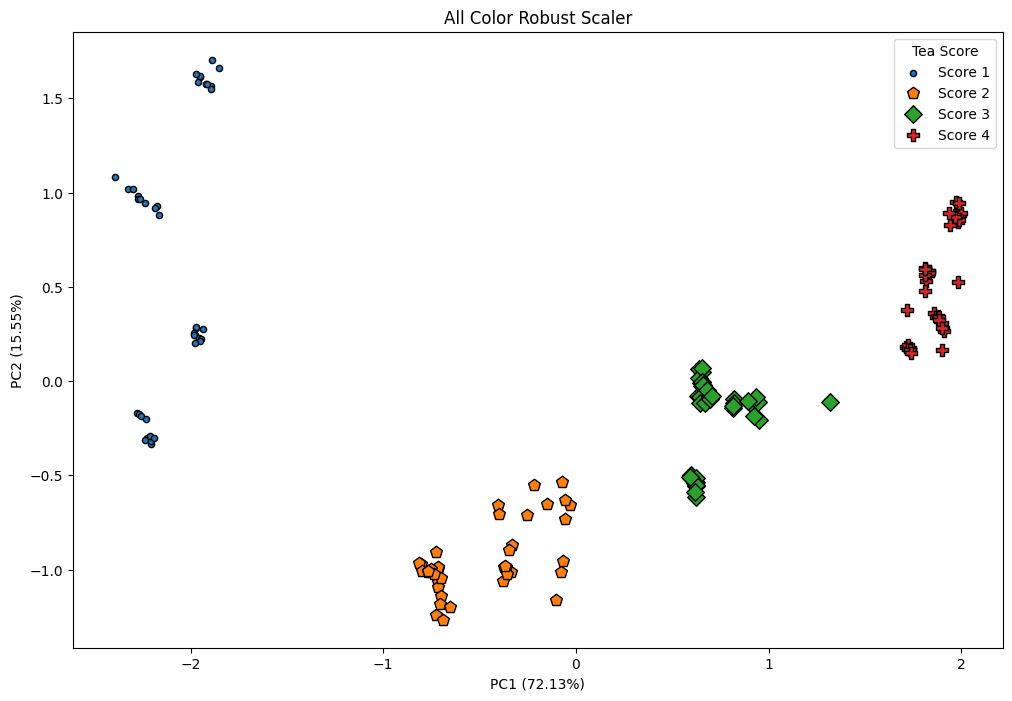

In [120]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

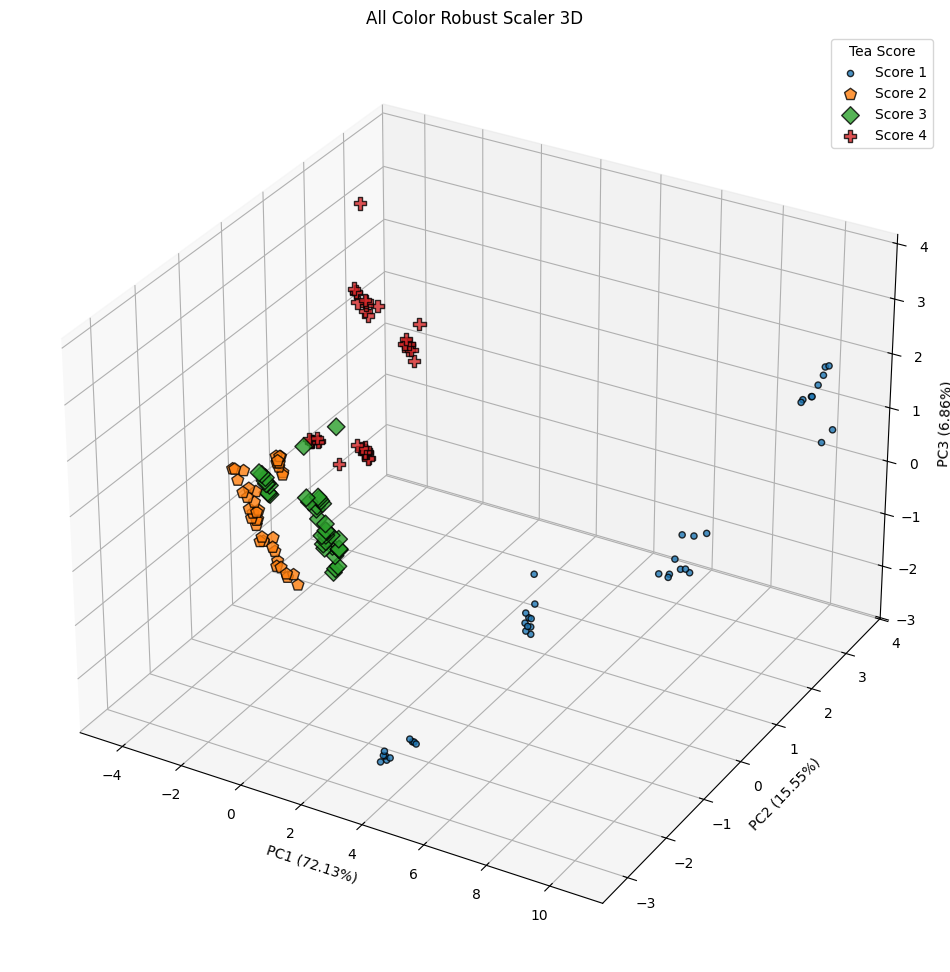

In [121]:
robust_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111, projection='3d')

for i, score in enumerate(unique_class):
    subset = robust_all_pca_df[robust_all_pca_df['encoded label'] == i]
    
    # Plot x, y, and z (PC1, PC2, PC3)
    ax.scatter(
        subset['PC1'], 
        subset['PC2'], 
        subset['PC3'],  # New Z-axis data
        label=score,
        marker=next(marker_cycle),
        edgecolors='k',
        s=80,
        alpha=0.8       # Slight transparency helps with depth perception
    )

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({explained_variance[2]*100:.2f}%)")

ax.set_title("All Color Robust Scaler 3D")
ax.legend(title='Tea Score')
plt.show()